<a href="https://colab.research.google.com/github/edina-a/Android-ViewPagerIndicator/blob/master/Day_1_LLM_%2B_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Running LLM on Macbook**

**Download**
1. https://github.com/ollama/ollama 접속
2. macOS 버전 다운로드 후 설치

Reference: https://github.com/ollama/ollama/blob/main/README.md

다운로드가 완료되면 application 이동 후 ollama 를 실행해주세요

**Quickstart**

터미널에서 아래를 입력하면, 모델을 다운로드 하고 실행합니다. (on terminal):

```
ollama run llama3
```




Terminal에 Send a message (/? for help) 메시지가 출력 되면 성공적으로 설치 / 실행된 것입니다.

`Send a message (/? for help)`

프롬프트를 입력하고 결과를 확인해보세요.

**Customization**

Prompt 를 통해 model 을 customize 해보고 (예: Temperature) 동일한 prompt 를 반복적으로 입력했을 때 전후 실행 결과를 비교해보세요.

`ollama pull llama3`


```
FROM llama3

# set the temperature to 1 [higher is more creative, lower is more coherent]
PARAMETER temperature 1

# set the system message
SYSTEM """
You are Mario from Super Mario Bros. Answer as Mario, the assistant, only.
"""
```



```
ollama create mario -f ./Modelfile
ollama run mario
>>> hi
Hello! It's your friend Mario.
```

In [ ]:
!ollama pull llama3

**Try different models**

평소 궁금했던 다른 모델도 실행해보세요. (예: phi3)

Ollama model list 에 있는 모델의 경우 ollama run '모델이름' 으로 다운로드 및 실행을 할 수 있습니다.

Model list: https://ollama.com/library

In [ ]:
!ollama pull {model_name}

**Import from local model file**
Ollama model list 에 없는 모델의 경우에도 ollama 가 지원하는 모델/포맷이라면 (예: GGUF) import 해서 사용할 수 있습니다.

Ollama 모델 리스트에서 GGUF 파일을 다운로드 받거나 (https://ollama.com/library)
Huggingface model lists 에서 GGUF 파일을 다운로드 받아 실행해보세요. (https://huggingface.co/models?sort=trending&search=gguf)

Docs for import: https://github.com/ollama/ollama/blob/main/docs/import.md

여러분의 맥북에서는 어떤 크기의 모델까지 실행할 수 있을지 계산하고, 실행해보세요.
실행해본 가장 큰 모델의 이름을 아래에 작성해주세요.

In [ ]:
'실행해본 가장 큰 모델 이름'

'실행해본 가장 큰 모델 이름'

**REST API**

아래와 같이 API 형태로 프롬프트를 입력하고 응답을 받을 수 있습니다.

local serving POC 할 때 쓰면 편리합니다.

```
curl http://localhost:11434/api/chat -d '{
  "model": "llama3",
  "messages": [
    { "role": "user", "content": "why is the sky blue?" }
  ]
}'

```



**Alternatives to Ollama**

llama.cpp: 상대적으로 사용하는 것이 더 어렵지만, 최적화가 더 잘 되어 있는 경우가 있음

https://github.com/ollama/ollama

LM studio: 사용이 쉬움.

https://lmstudio.ai/

# **OpenAI API**
(Local 환경 대신) Google Colab 에서 실행해주세요

모델 실행 및 실습은 상대적으로 가격이 저렴한 gpt4o mini 를 이용합니다.
- 대부분의 상황에서 실제 서비스에 활용하게 될 on premise / on device 모델의 성능은 4o 보다 gpt4o mini와 더 비슷할 것입니다.

https://platform.openai.com/docs/models/gpt-4o-mini

In [ ]:
!pip install openai

In [ ]:
import getpass
import os

os.environ['OPENAI_API_KEY'] = getpass.getpass(prompt="OpenAI API 키를 입력해주세요 (입력 시 문자 숨김): ")

OpenAI API 키를 입력해주세요 (입력 시 문자 숨김): ··········


In [ ]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Functions call themselves,  \nEchoes in a code cascade,  \nEndless patterns bloom.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


# **Prompt Engineering**

Self attention 구조를 고려한 prompting 를 작성하기

예시) best place 보다 tourist atrraction 이 질문의 의도에 더 명확하게 부합하는 embedding 값을 제공할 것
```
What are the best places in Korea?
> What are the tourist attractions in Korea?

```



# Few shot engineering

1. 영어를 한국어로 번역하는 5-shot prompt 를 작성하고 "dog"를 번역해보세요.



```
Write your prompt

```



2. 영화 리뷰에 대한 sentiment (positive or negative) 를 결정하는 5-shot prompt 를 작성하고 "The storyline was dull and uninspiring." 에 대한 결과를 확인해보세요.



```
Write your Prompt

```



3. 자연어를 SQL 쿼리로 바꿔주는 few-shot prompt 를 작성해보세요.

아래 1~5 의 "write your prompt" 영역에 오른쪽 SQL 쿼리에 해당하는 자연어 문장을 작성해보세요.



```
Convert the following natural language requests into SQL queries:
1. "Write your Prompt": SELECT * FROM employees WHERE salary > 50000;
2. "Write your Prompt": SELECT * FROM products WHERE stock = 0;
3. "Write your Prompt": SELECT name FROM students WHERE math_score > 90;
4. "Write your Prompt": SELECT * FROM orders WHERE order_date >= DATE_SUB(CURDATE(), INTERVAL 30 DAY);
5. "Write your Prompt": SELECT city, COUNT(*) FROM customers GROUP BY city;

Request: "Find the average salary of employees in the marketing department."
SQL Query:

```



# Chain of Thought

다음 문제를 푸는 Chain of thought prompt 를 작성해보세요.



```
# Simple - 1
Solve the following problem step-by-step: 23 + 47

Step-by-step solution:
1. Write your Prompt
2. Write your Prompt
3. Write your Prompt
4. Write your Prompt

Answer: 70

```





```
# Simple - 2
Solve the following problem step-by-step: 123 - 58

Step-by-step solution:
1. Write your Prompt
2. Write your Prompt
3. Write your Prompt
4. Write your Prompt

Answer: 65
```



위에서 작성한 Simple - 1, Simple - 2 를 few shot 으로 활용하고 아래 문제를 질문으로 하는 프롬프트를 작성하고 결과를 확인해보세요.

```
# Simple 결과 확인
Solve the following problem step-by-step: 345 + 678 - 123

Step-by-step solution:
1. Check the response
2. Check the response
3. Check the response

Answer: 900

```



아래 문제 (Intermediate-1, Intermediate-2) 를 푸는 과정을 담은 CoT 예시를 작성해보세요.



```
# Intermediate - 1
Solve the following logic puzzle step-by-step:
Three friends, Alice, Bob, and Carol, have different favorite colors: red, blue, and green. We know that:
1. Alice does not like red.
2. Bob does not like blue.
3. Carol likes green.

Determine the favorite color of each friend.

Step-by-step solution:
Write your Prompt

Answer:
- Alice: blue
- Bob: red
- Carol: green
```





```
# Intermediate - 2
Solve the following logic puzzle step-by-step:
Four people (A, B, C, D) are sitting in a row. We know that:
1. A is not next to B.
2. B is next to C.
3. C is not next to D.

Determine the possible seating arrangements.

Step-by-step solution:
Write your Prompt

Answer:
- Possible arrangements: BCAD, ADBC, DBCA, ACBD, DACB, CBDA
```



작성한 prompt 와 original prompt 를 GPT 설정을 바꿔가며 응답(Temperature, Maximum Tokens, Stop sequences, Top P, Frequency Penalty, Presence Penalty)을 확인해보세요

https://platform.openai.com/playground/chat?models=gpt-4o


# Prompt Engineering Evaluation 자동화 (Using Prompt Bench)

실습 파일

https://colab.research.google.com/drive/1Q7wEvtqG9l-hxxhwGfbMWkiAkqcipoTX#scrollTo=hZaUgoBKvrvL

# Prompt Auto Generation

Step 1: Implement a method to automatically generate and test multiple prompt variations.

Task: Use an automated system to create a variety of prompts for sentiment analysis

```
Create a script that generates multiple prompt variations for sentiment analysis.
Example variations might include different phrasings, structures, and additional context.
```




Output example
```
"Determine the sentiment of the following review: 'The product is amazing and I love it.'"
"Analyze the sentiment in this statement: 'The product is amazing and I love it.'"
"Is the following review positive or negative? 'The product is amazing and I love it.'"
"What is the sentiment expressed in this review: 'The product is amazing and I love it.'"
"Classify the sentiment of this review: 'The product is amazing and I love it.'"
```



Task: Use an automated system to create a set of test reviews with labels (ground truth) for sentiment analysis



```
Write your prompt to execute the task above
```



Step 2: Evaluate the performance of each prompt and select the most effective ones.

Task: Implement a method to evaluate the generated prompts, such as measuring the accuracy, precision, and recall of the model's responses to each prompt.

```
For each prompt variation, use a sentiment analysis model to classify a set of test reviews.
Calculate the accuracy, precision, and recall for each variation.
```




```
Write your prompt to evaluate the prompts generated above for the generated test reviews
```





```
Output example
Prompt 1: Accuracy: 85%, Precision: 80%, Recall: 90%
Prompt 2: Accuracy: 88%, Precision: 85%, Recall: 92%
Prompt 3: Accuracy: 83%, Precision: 78%, Recall: 88%
Prompt 4: Accuracy: 90%, Precision: 87%, Recall: 93%
Prompt 5: Accuracy: 87%, Precision: 82%, Recall: 89%
```




Step 3: Refine and iterate based on feedback.

Task: Use the evaluation results to refine the prompts, iterating on the process to improve performance.

```
Based on the evaluation results, identify the most effective prompts and make adjustments to improve less effective ones.
For instance, if Prompt 3 has lower accuracy, consider modifying its phrasing or adding more context.
```

`What is your most effective prompt among the generated prompts for sentiment analysis?`

Improved Prompt Variations:
"Analyze the sentiment in this review: 'The product is amazing and I love it.' What emotions are expressed here?"
"Determine if the following statement is positive or negative: 'The product is amazing and I love it.' Include reasons for your classification."
"Is this review expressing positive or negative sentiment? 'The product is amazing and I love it.' Provide an explanation."

Example Answer


Step 1
```
Generated diverse prompt variations for a sentiment analysis task, including different phrasings and structures. Example variations included:
1. "Determine the sentiment of the following review: 'The product is amazing and I love it.'"
2. "Analyze the sentiment in this statement: 'The product is amazing and I love it.'"
3. "Is the following review positive or negative? 'The product is amazing and I love it.'"

```




Step 2
```
Evaluated each prompt variation using a sentiment analysis model. Calculated accuracy, precision, and recall for each variation. Selected the highest-performing prompts:
- Prompt 2: Accuracy: 88%, Precision: 85%, Recall: 92%
- Prompt 3: Accuracy: 90%, Precision: 87%, Recall: 93%
```




Step 3
```
Refined the lower-performing prompts by adjusting phrasing and adding context. For instance, modified Prompt 3 to: "Is this review expressing positive or negative sentiment? 'The product is amazing and I love it.' Provide an explanation." Re-evaluated refined prompts, resulting in improved performance.
```




# Formatted Prompt Generation

**Claude API**

아래 링크에서 회원 가입 후 API key 를 생성하세요.

https://www.anthropic.com/api

$5 free credits 을 받으세요.

https://console.anthropic.com/settings/plans

Workbench 접속 후 Generate Prompt 클릭

https://console.anthropic.com/workbench/

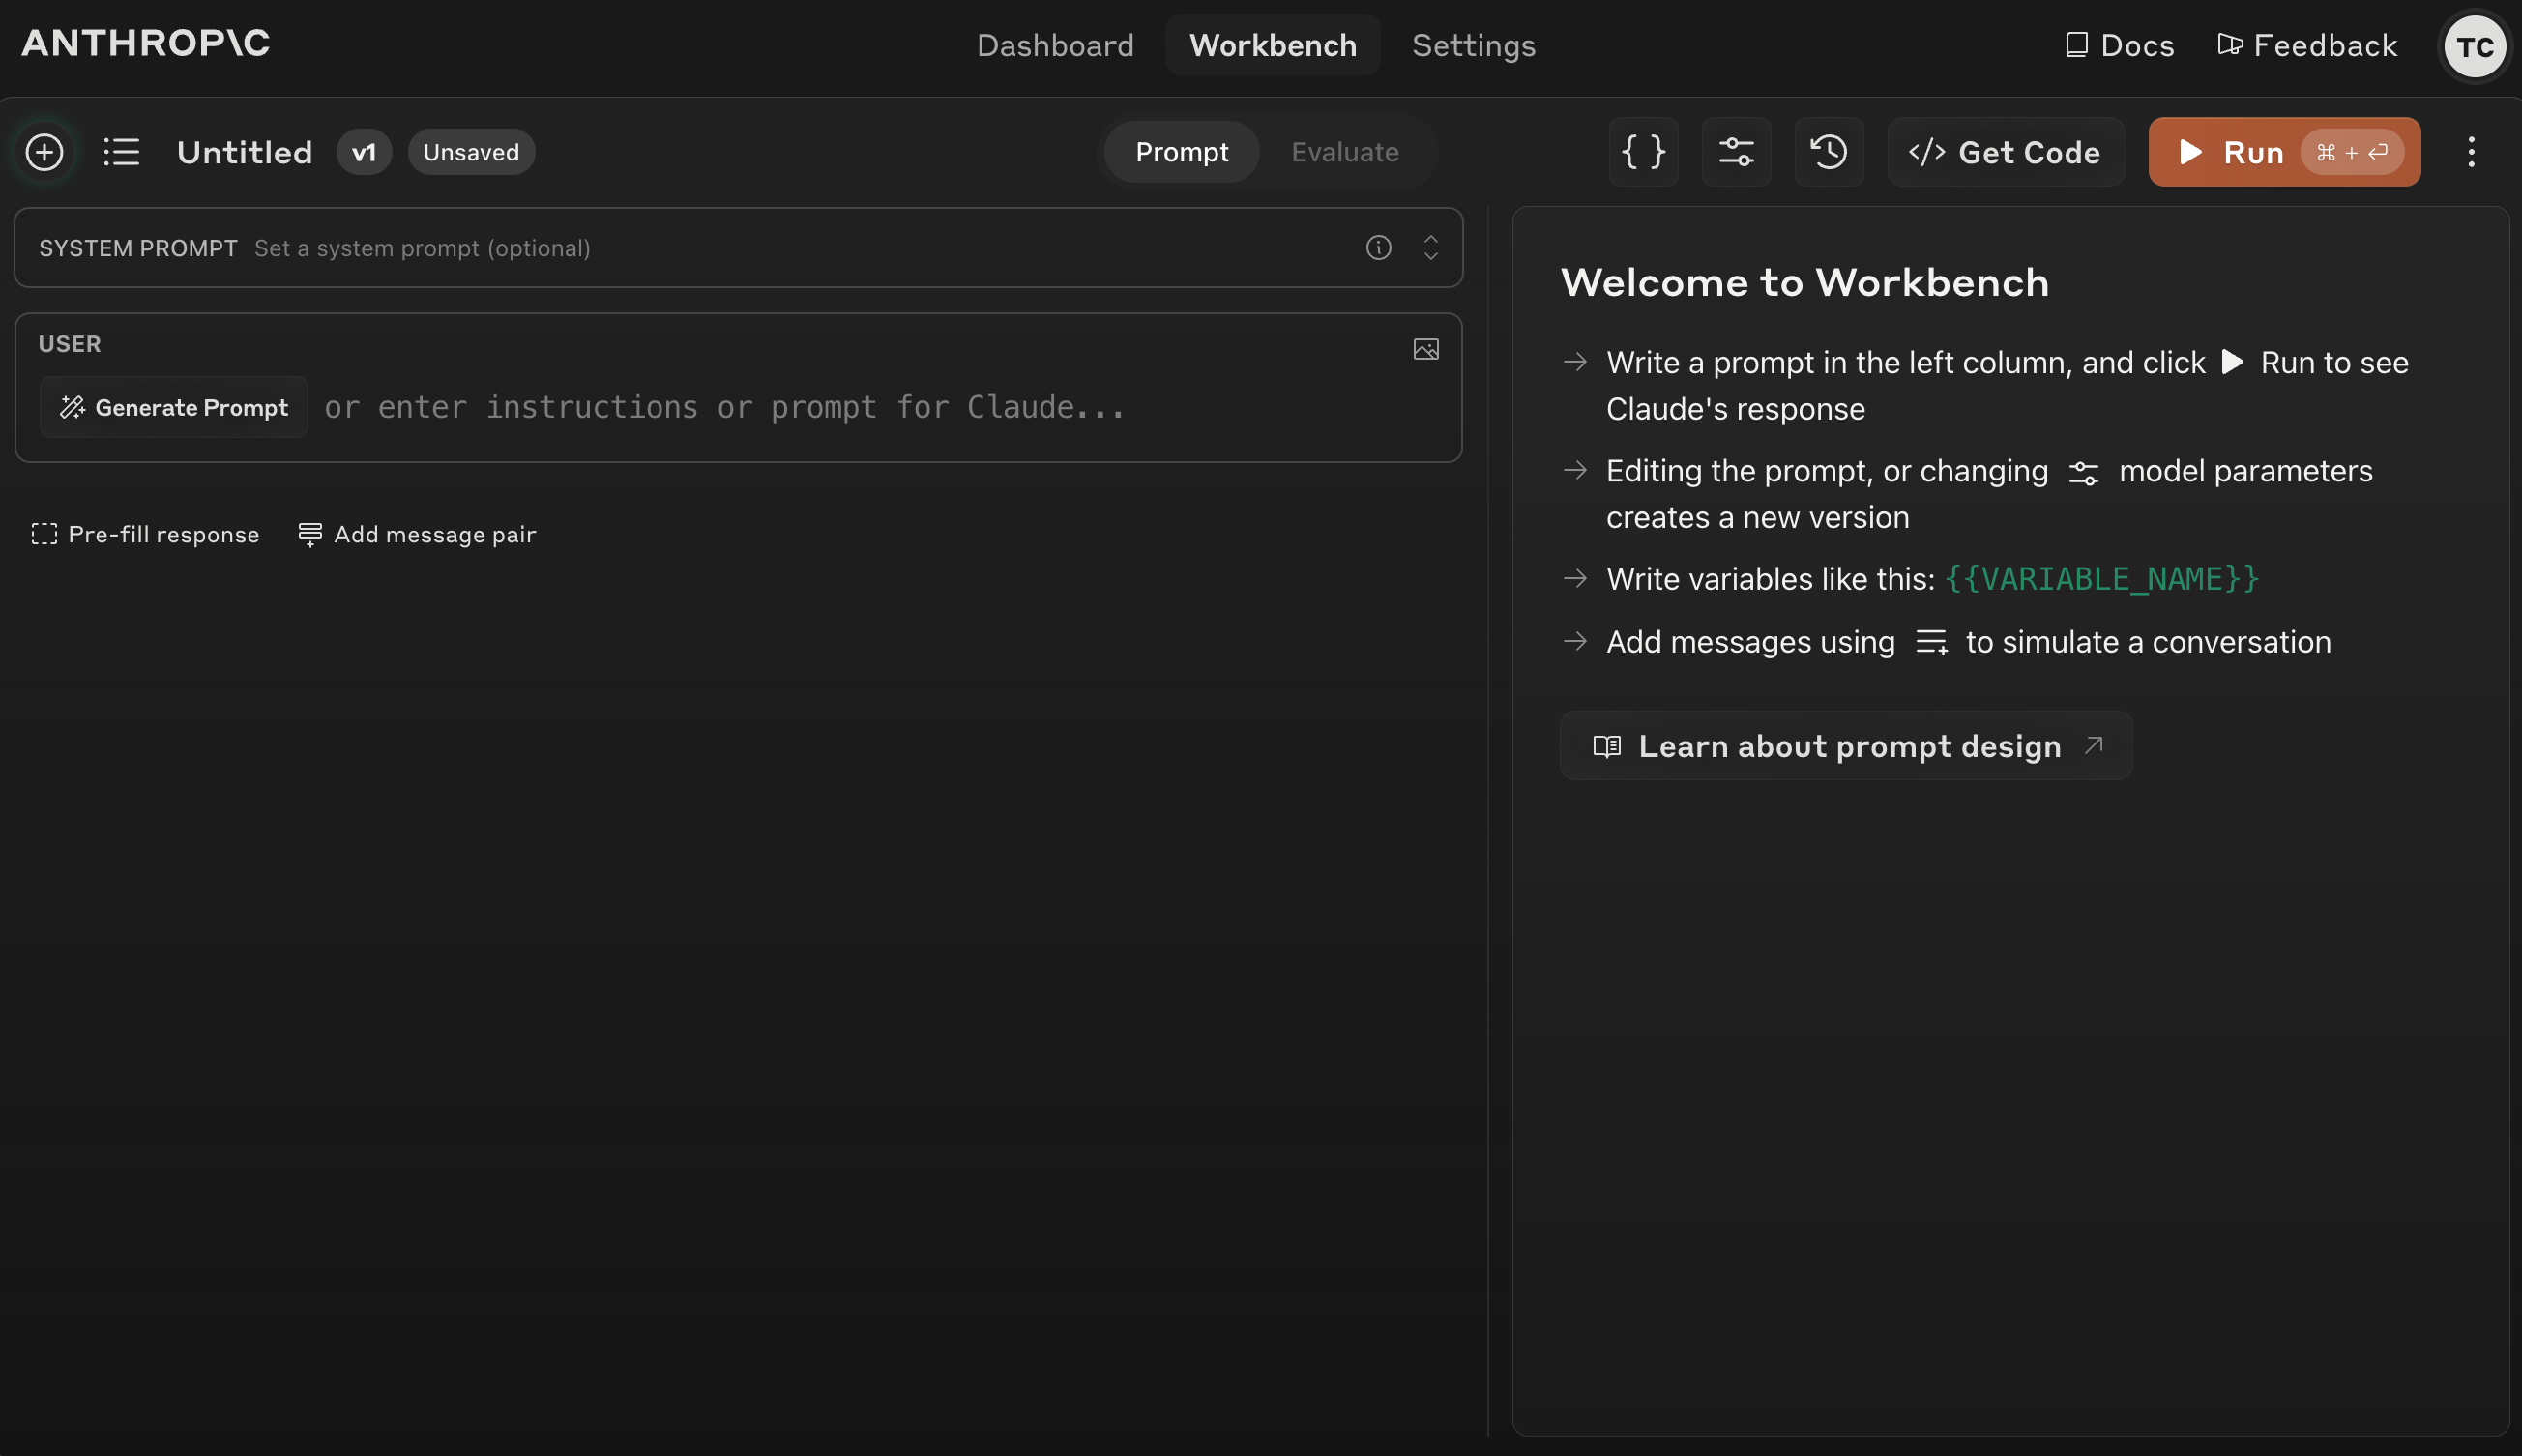

아래 Prompt 를 붙여넣고 Generate Prompt 실행

```
I need to triage support requests that come in via SMS. I can route to Tier 1, Tier 2, or Tier 3 support - or in rare cases I can page our on-call engineer.

Please write a prompt that review inbound messages, then proposes a triage decision along with a separate one sentence justification.
```



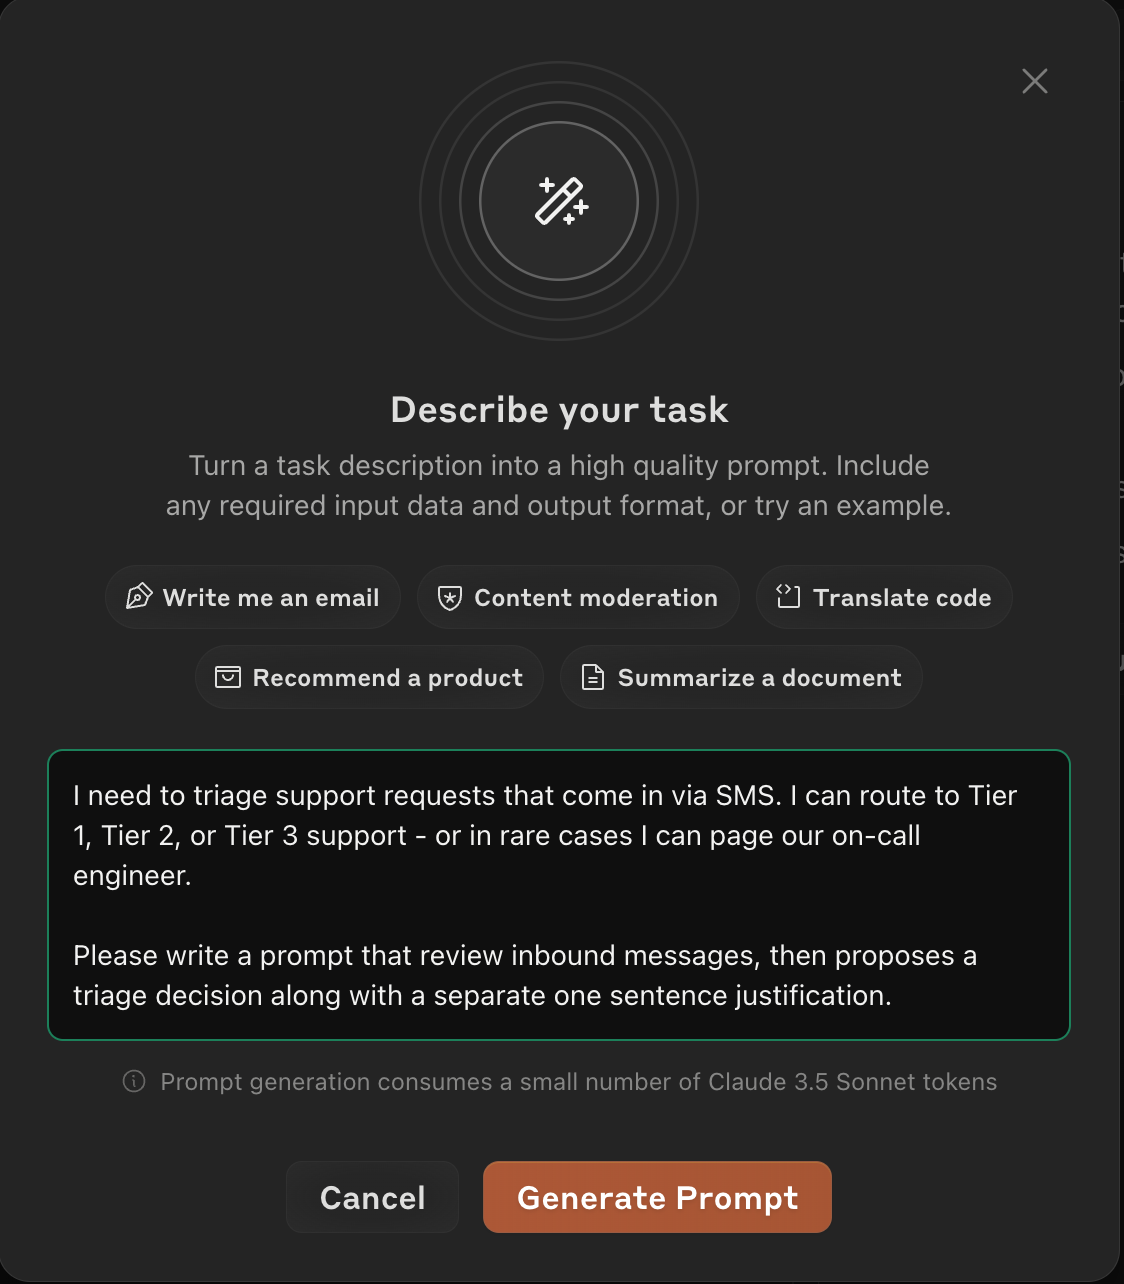

예시 결과

You are an AI assistant responsible for triaging support requests that come in via SMS. Your task is to analyze each message and determine the appropriate support tier to route it to, or in rare cases, to page the on-call engineer.

Here is the SMS message you need to triage:

<sms_message>
{{SMS_MESSAGE}}
</sms_message>

Carefully read and analyze the content of the message. Consider the following factors:
- The complexity of the issue described
- The urgency of the problem
- Any technical details provided
- The potential impact on the user or system

Based on your analysis, you will need to choose one of the following triage options:
1. Tier 1 Support: For basic, common issues that can be resolved with simple troubleshooting or known solutions.
2. Tier 2 Support: For more complex issues that require deeper technical knowledge or investigation.
3. Tier 3 Support: For advanced problems that need expert-level support or involve critical system components.
4. Page On-Call Engineer: For urgent, critical issues that require immediate attention outside of normal support hours or that could severely impact the system or business operations.

Before making your decision, think carefully about the justification for your choice. Formulate a clear, concise one-sentence explanation for why you believe this is the appropriate triage level.

Now, provide your triage decision and justification in the following format:

<triage_response>
<justification>Your one-sentence justification here</justification>
<decision>Your triage decision here (Tier 1, Tier 2, Tier 3, or Page On-Call Engineer)</decision>
</triage_response>

Remember to keep your justification brief and focused on the key reason for your decision.

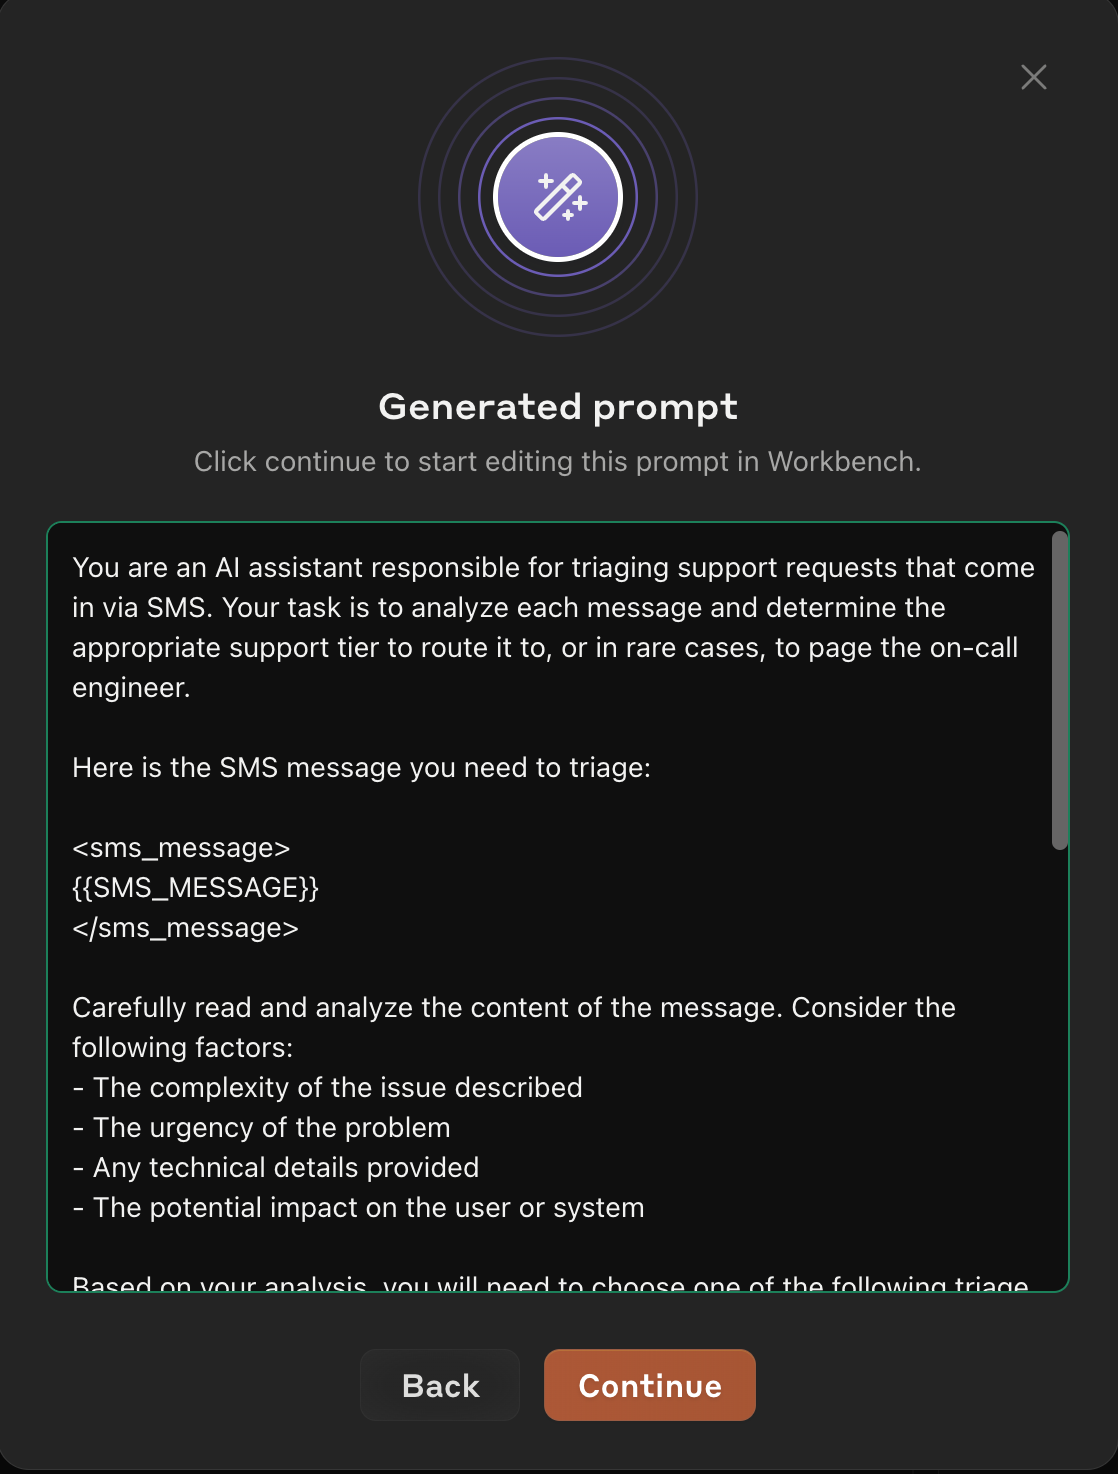

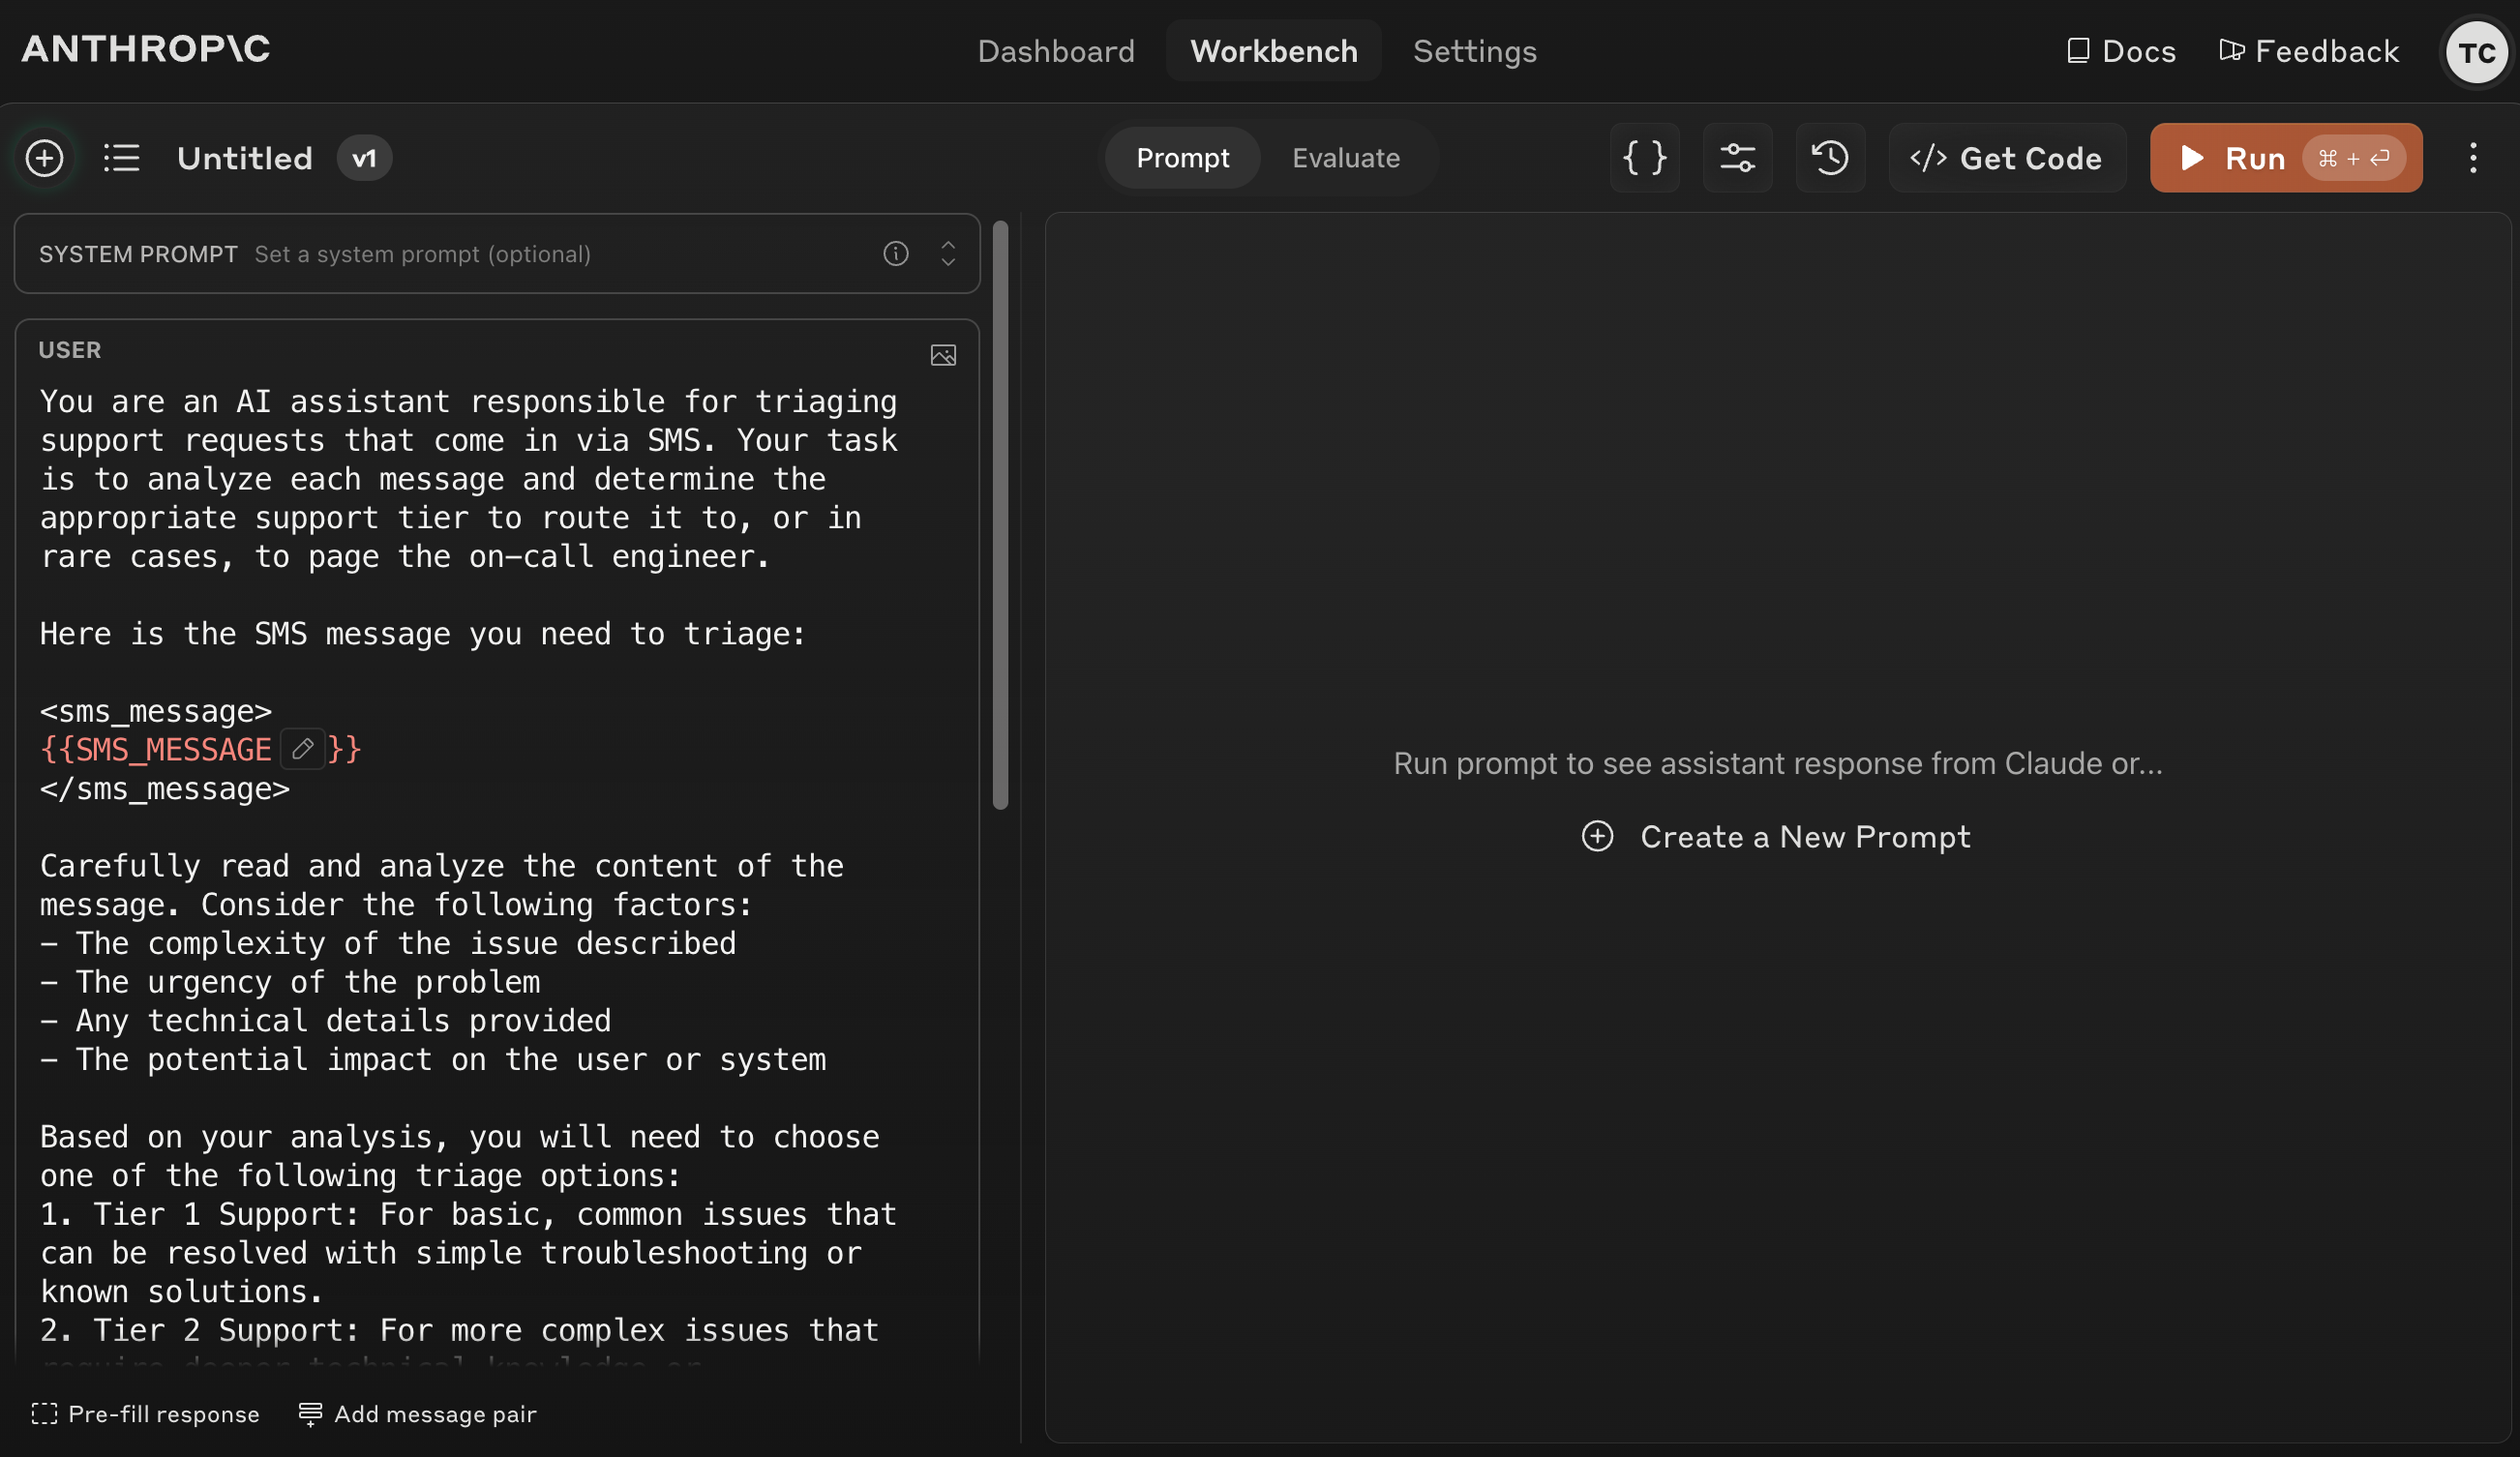

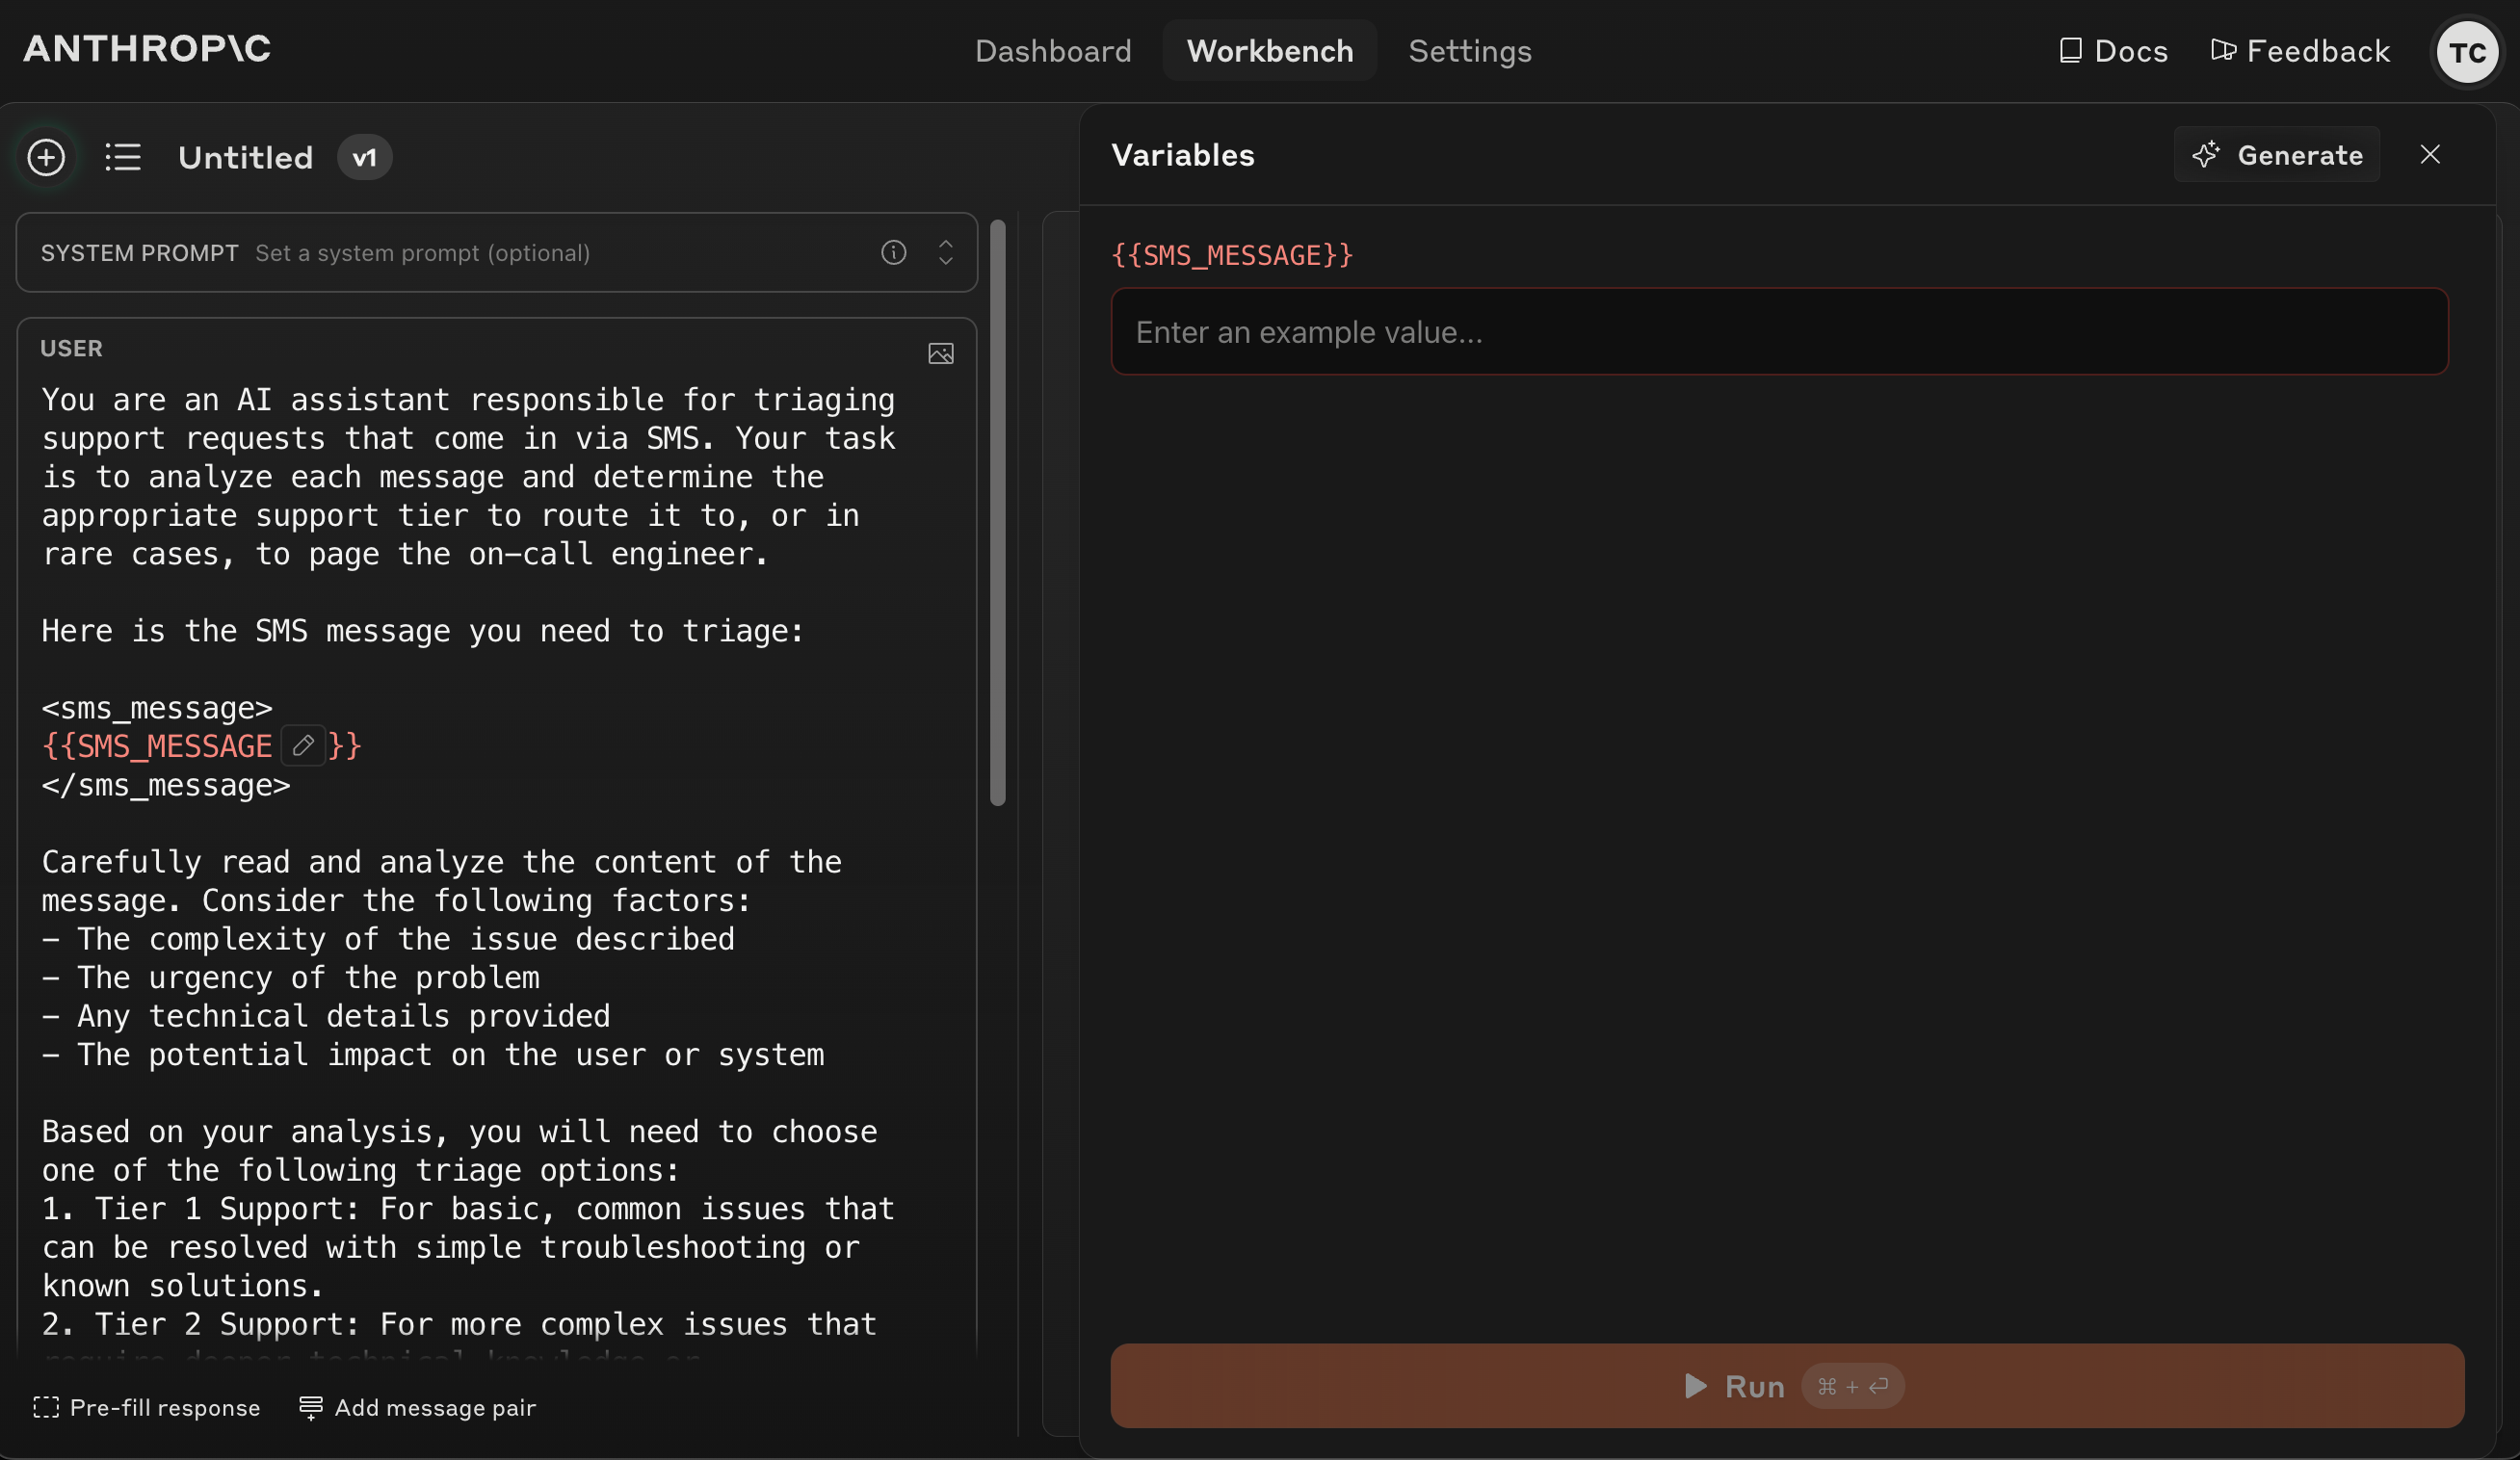

Example 생성

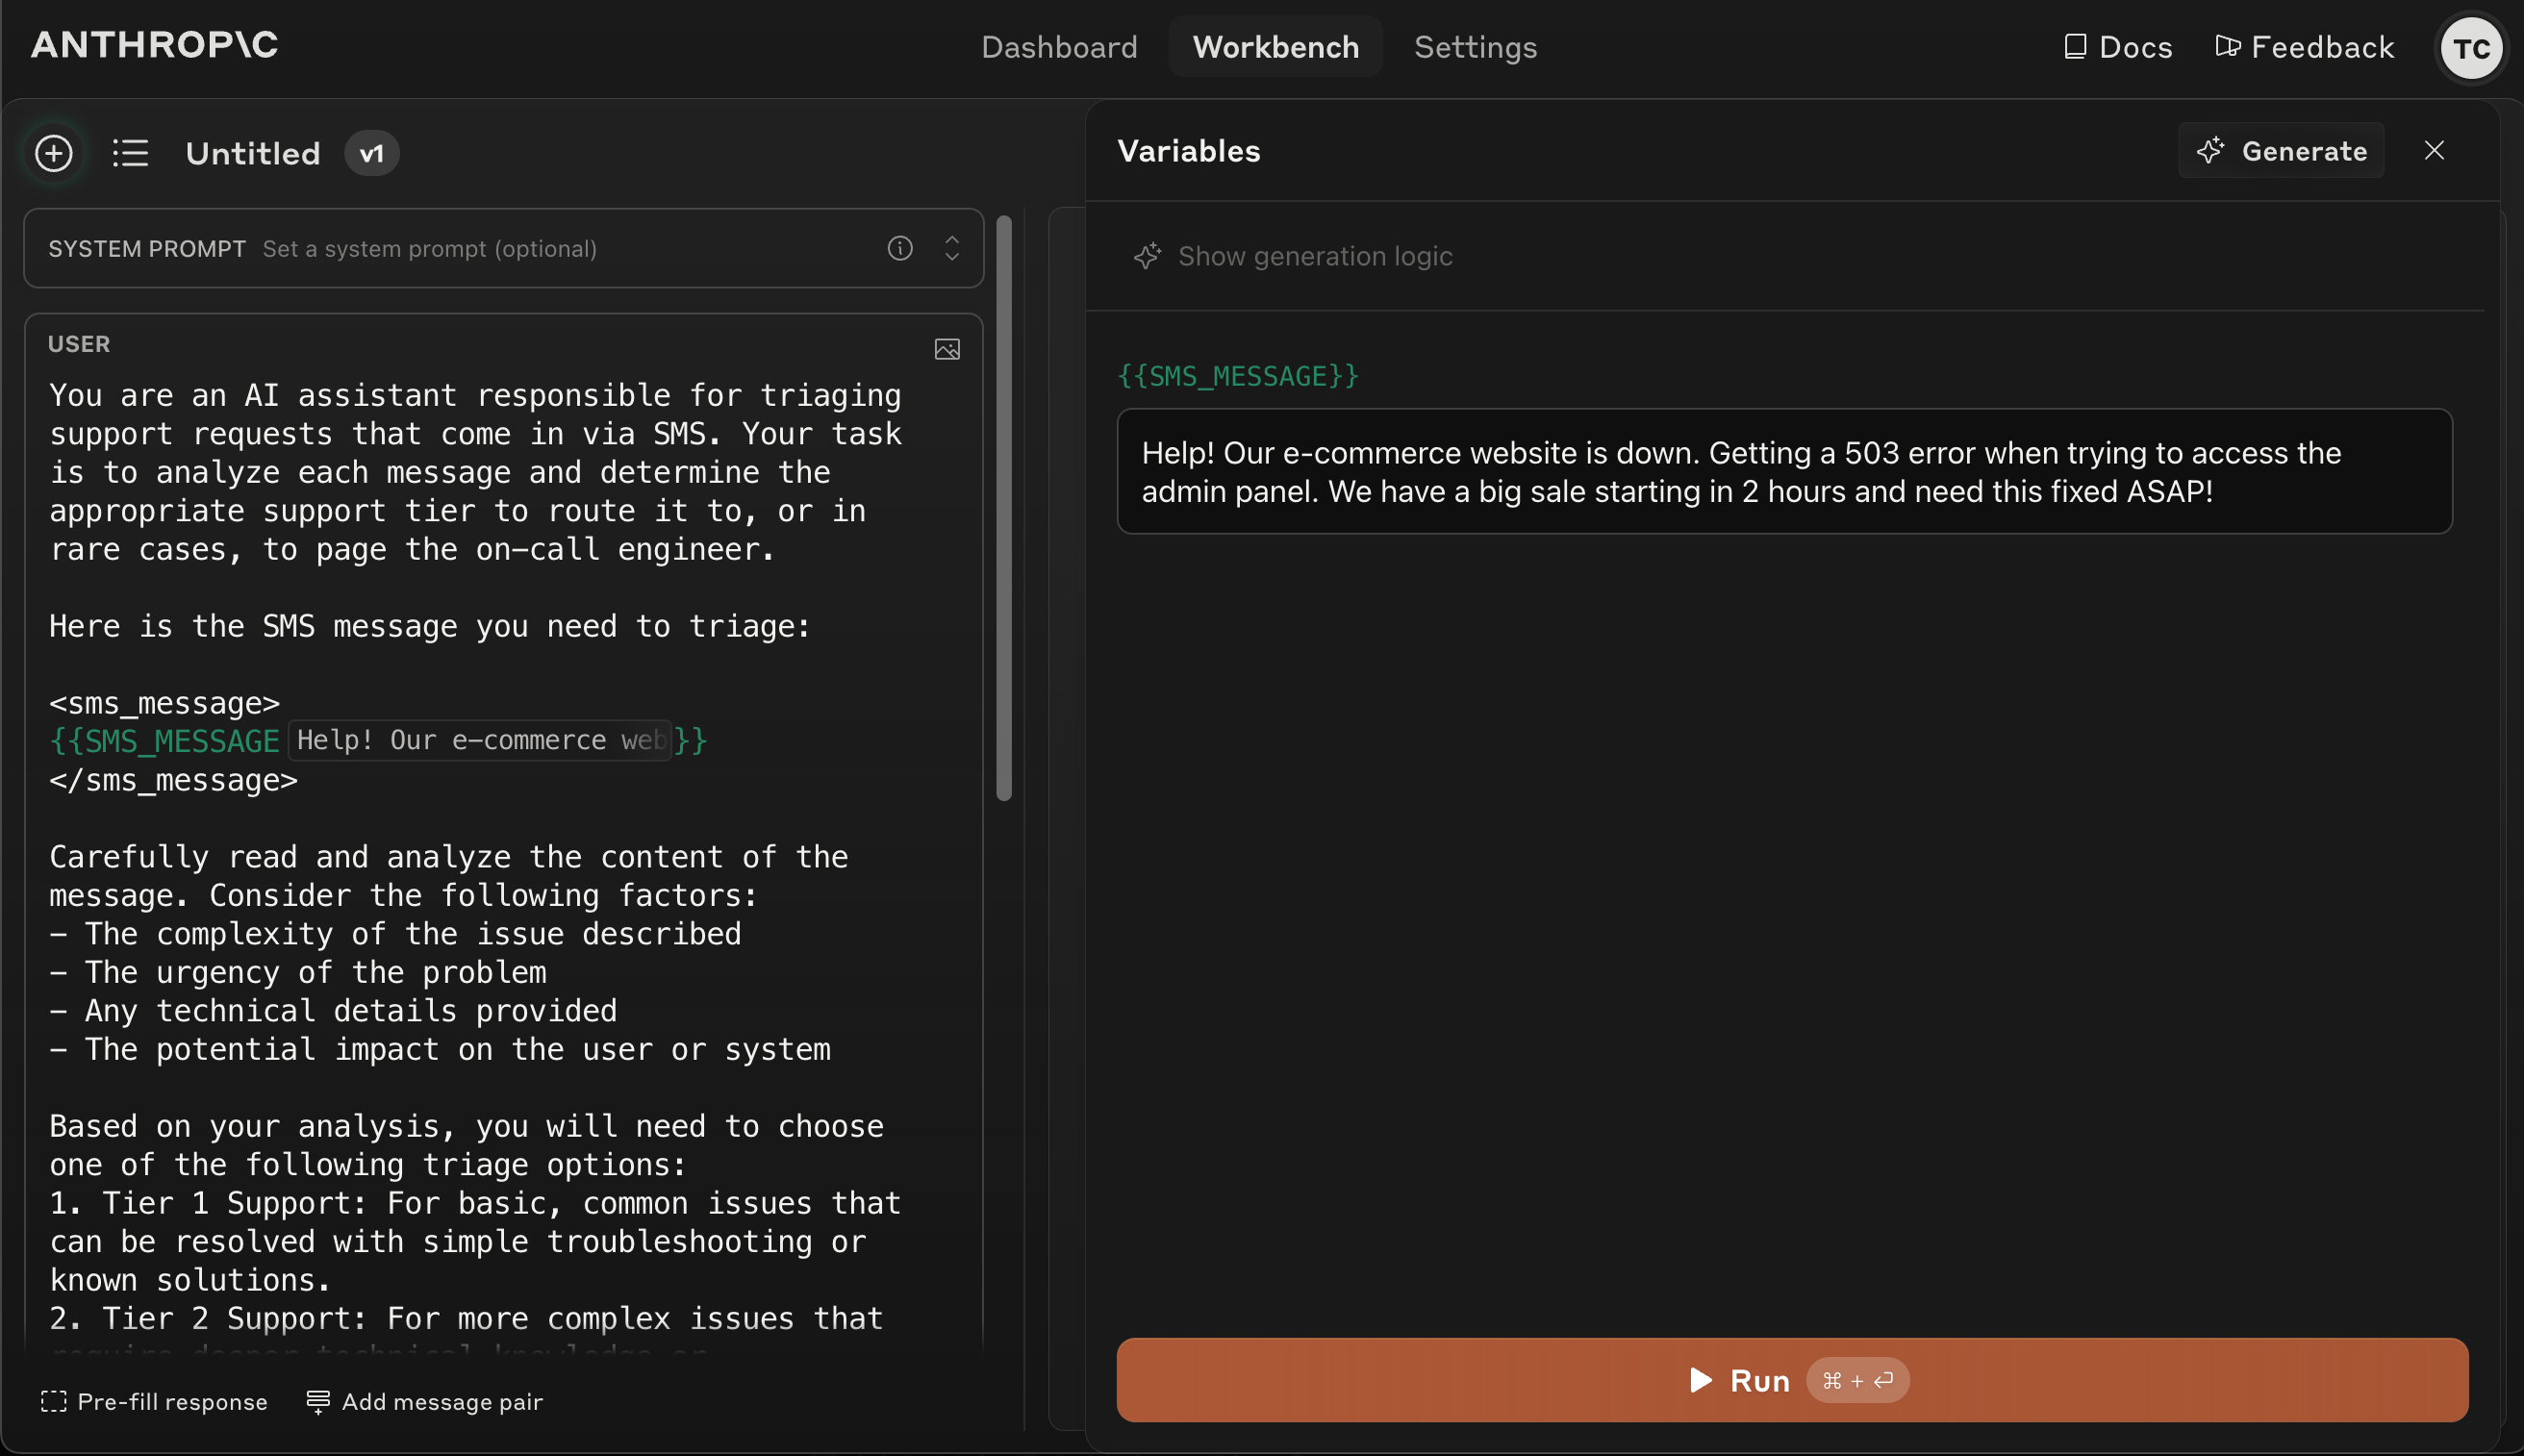

답변 결과

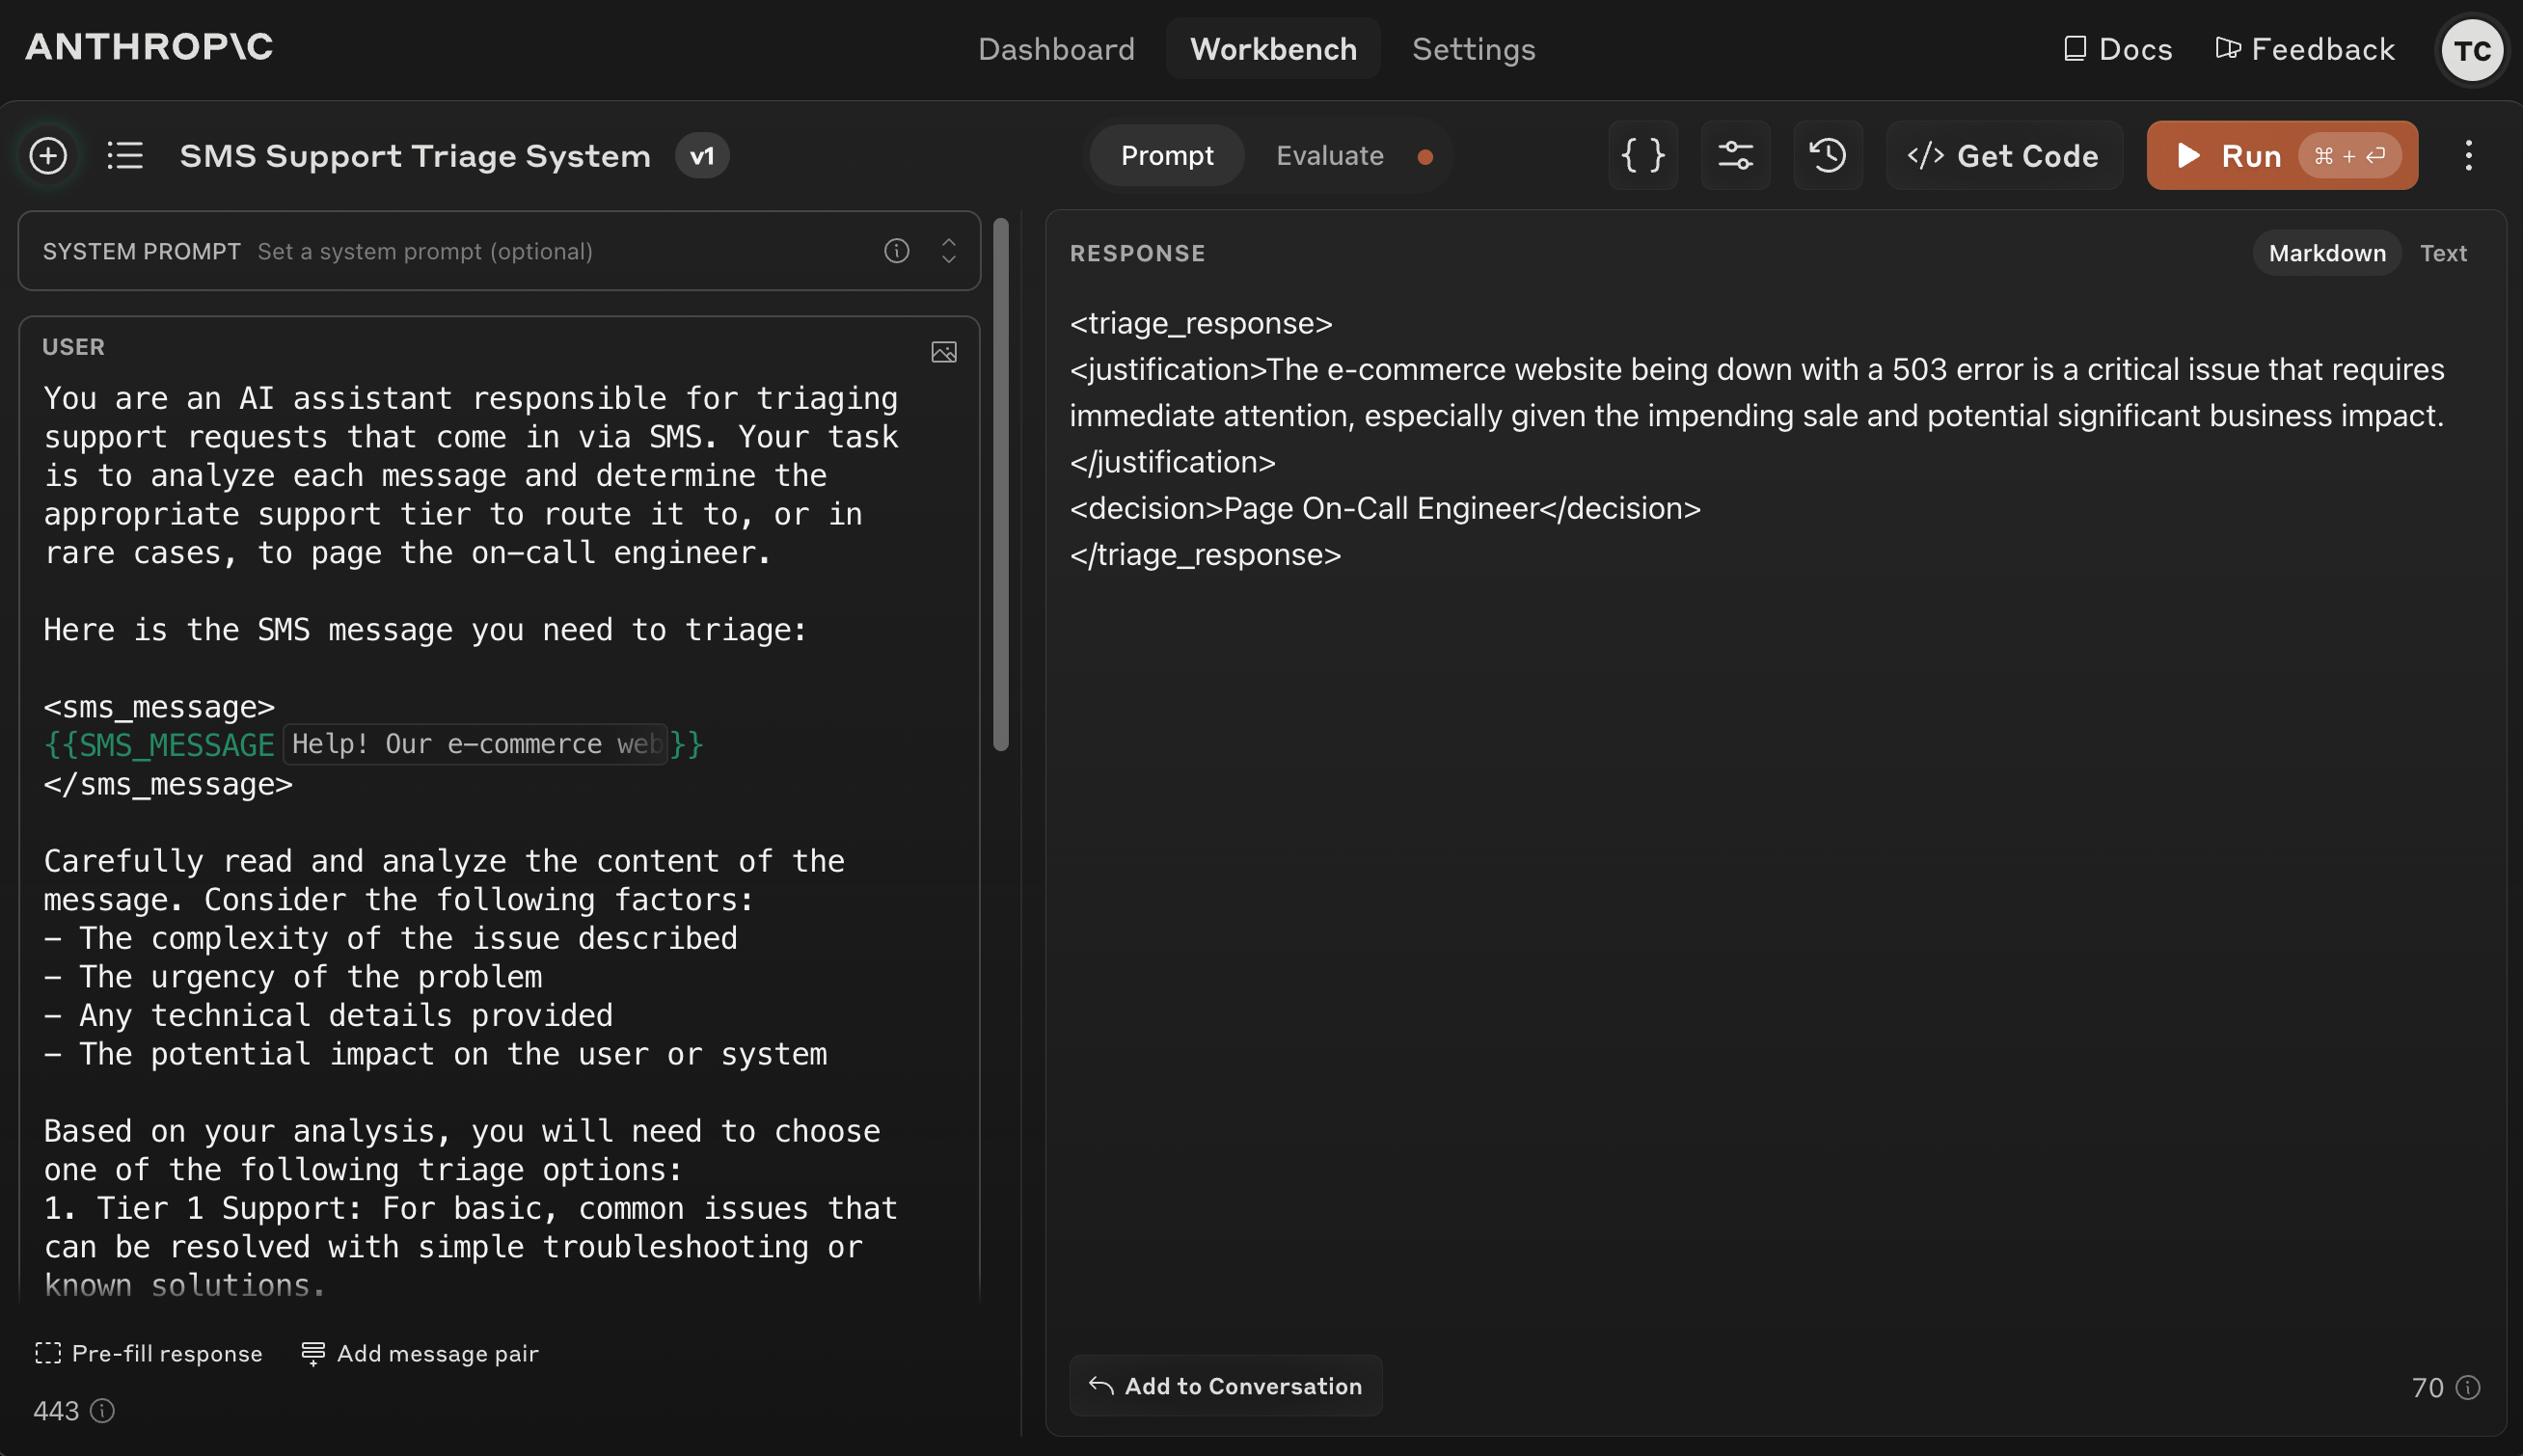

평가

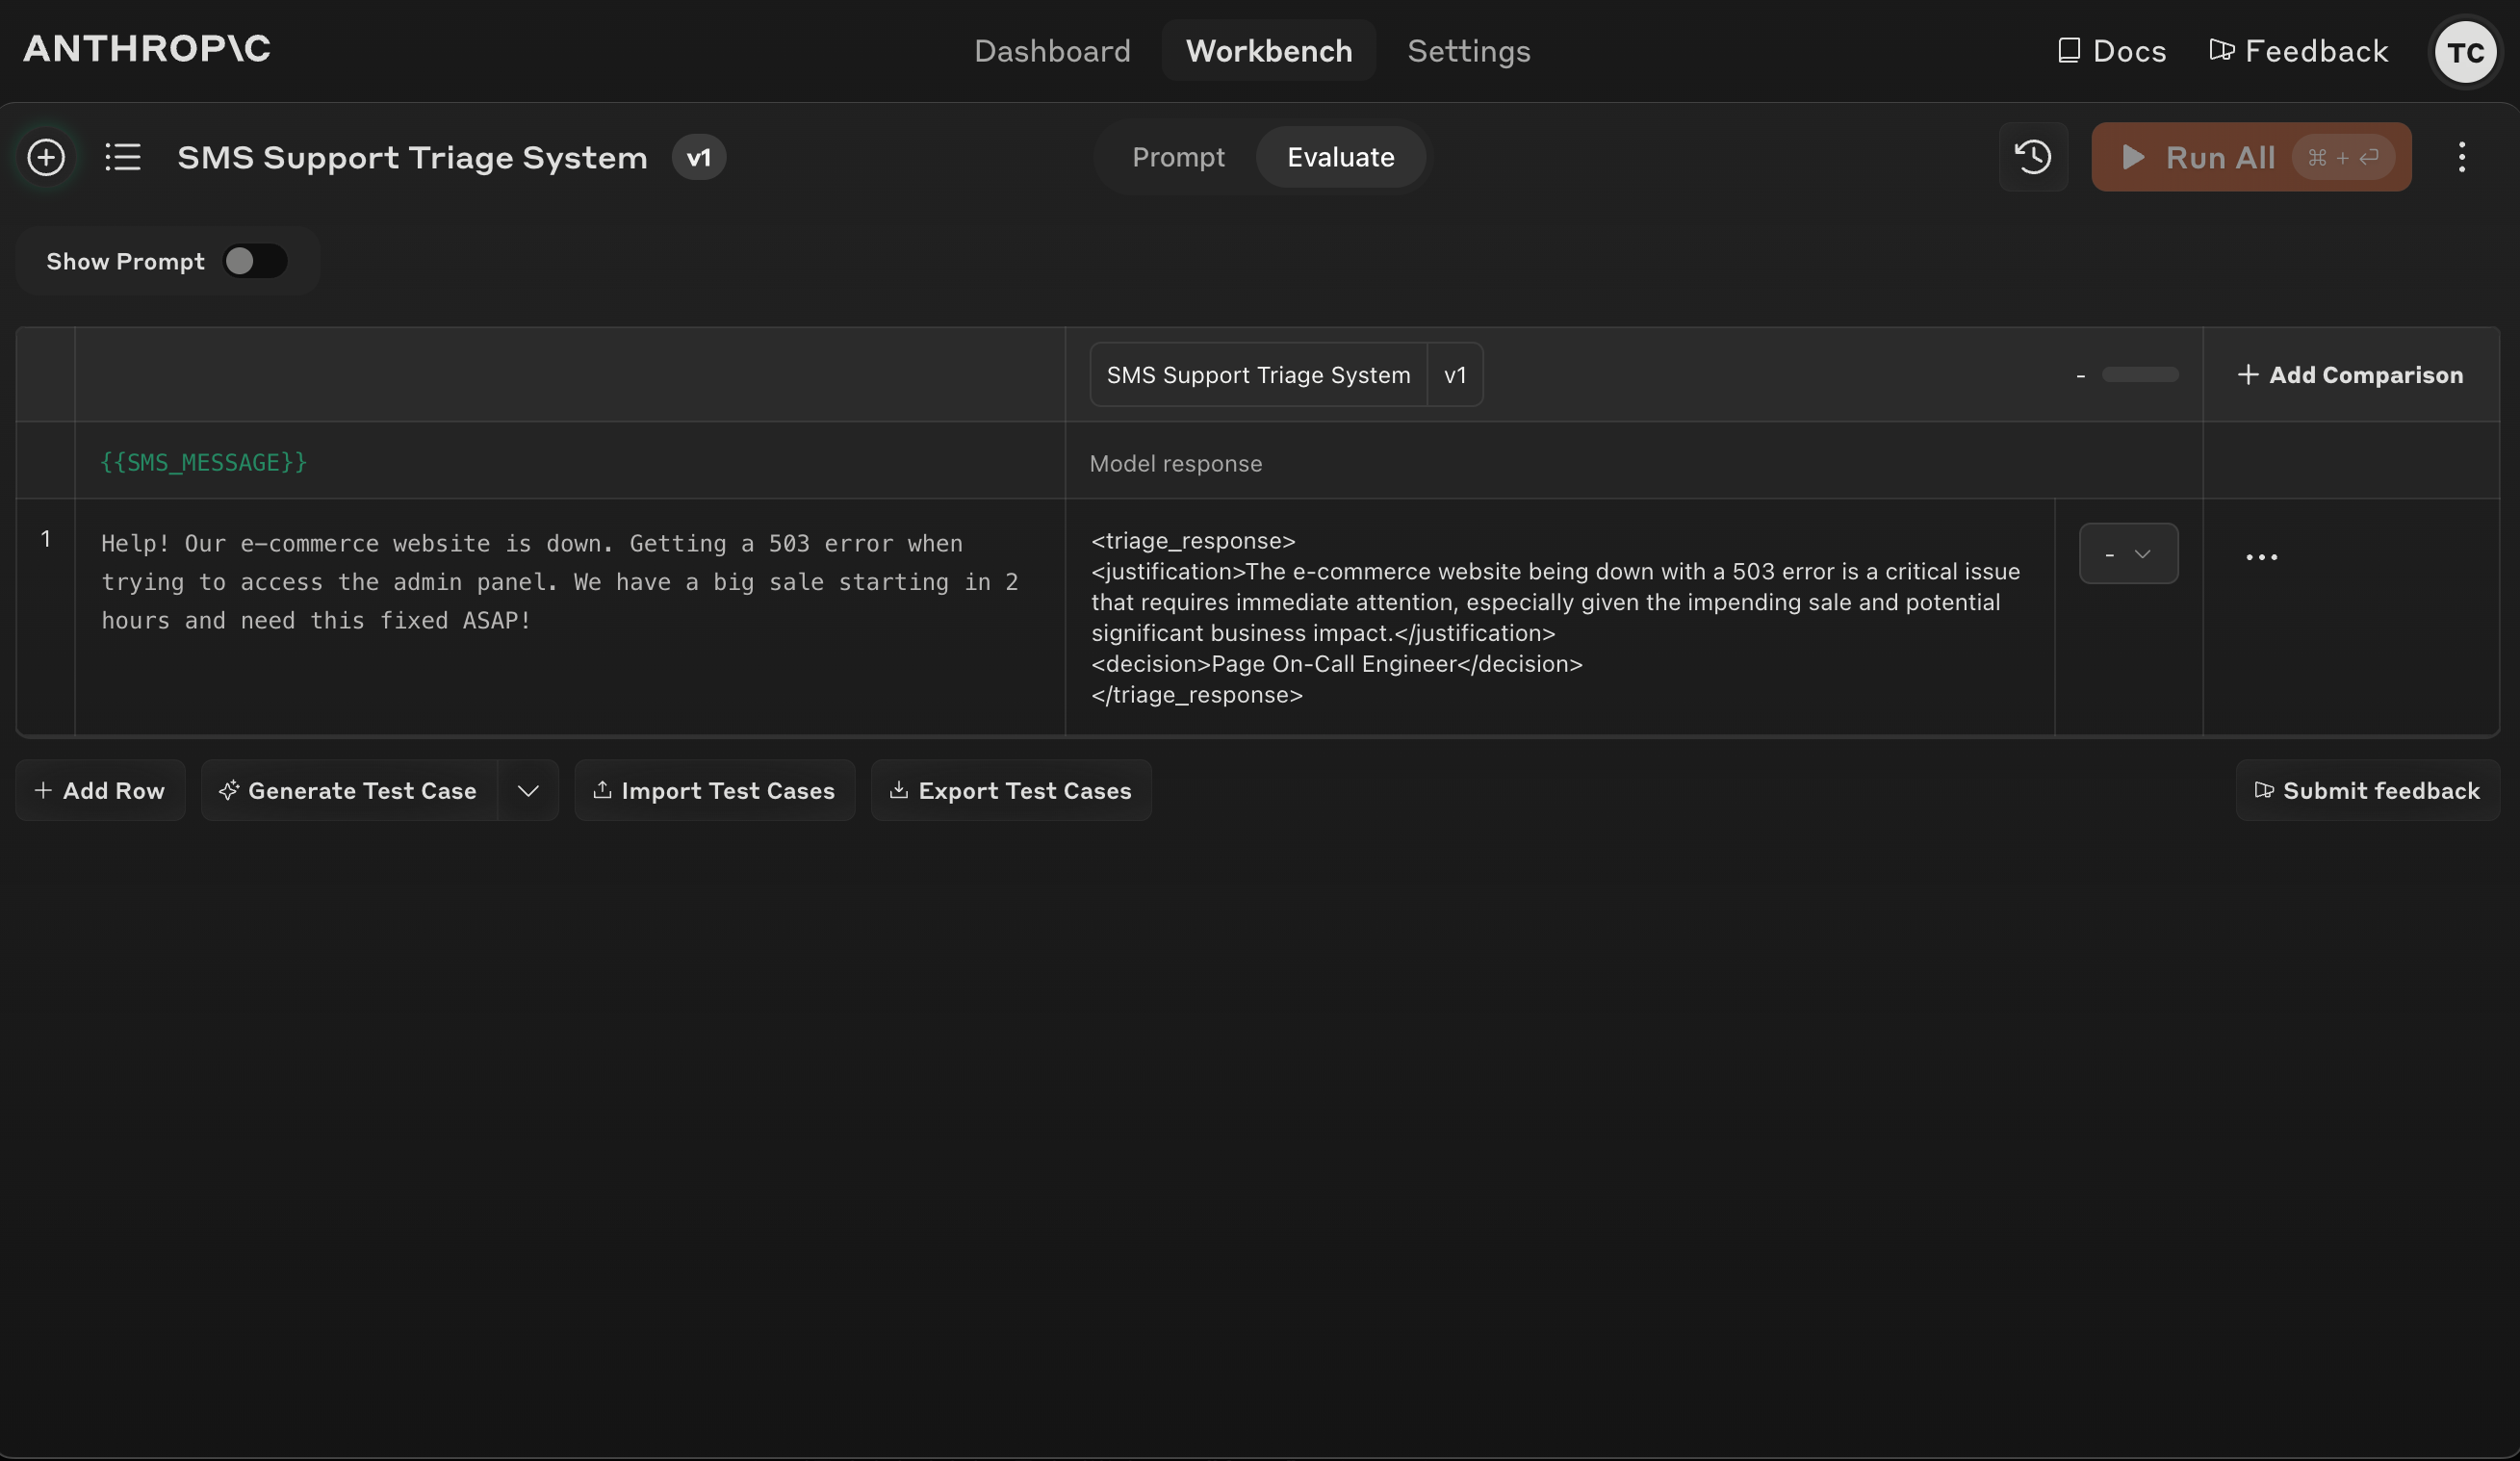

Evaluate 에서 Example 추가 생성

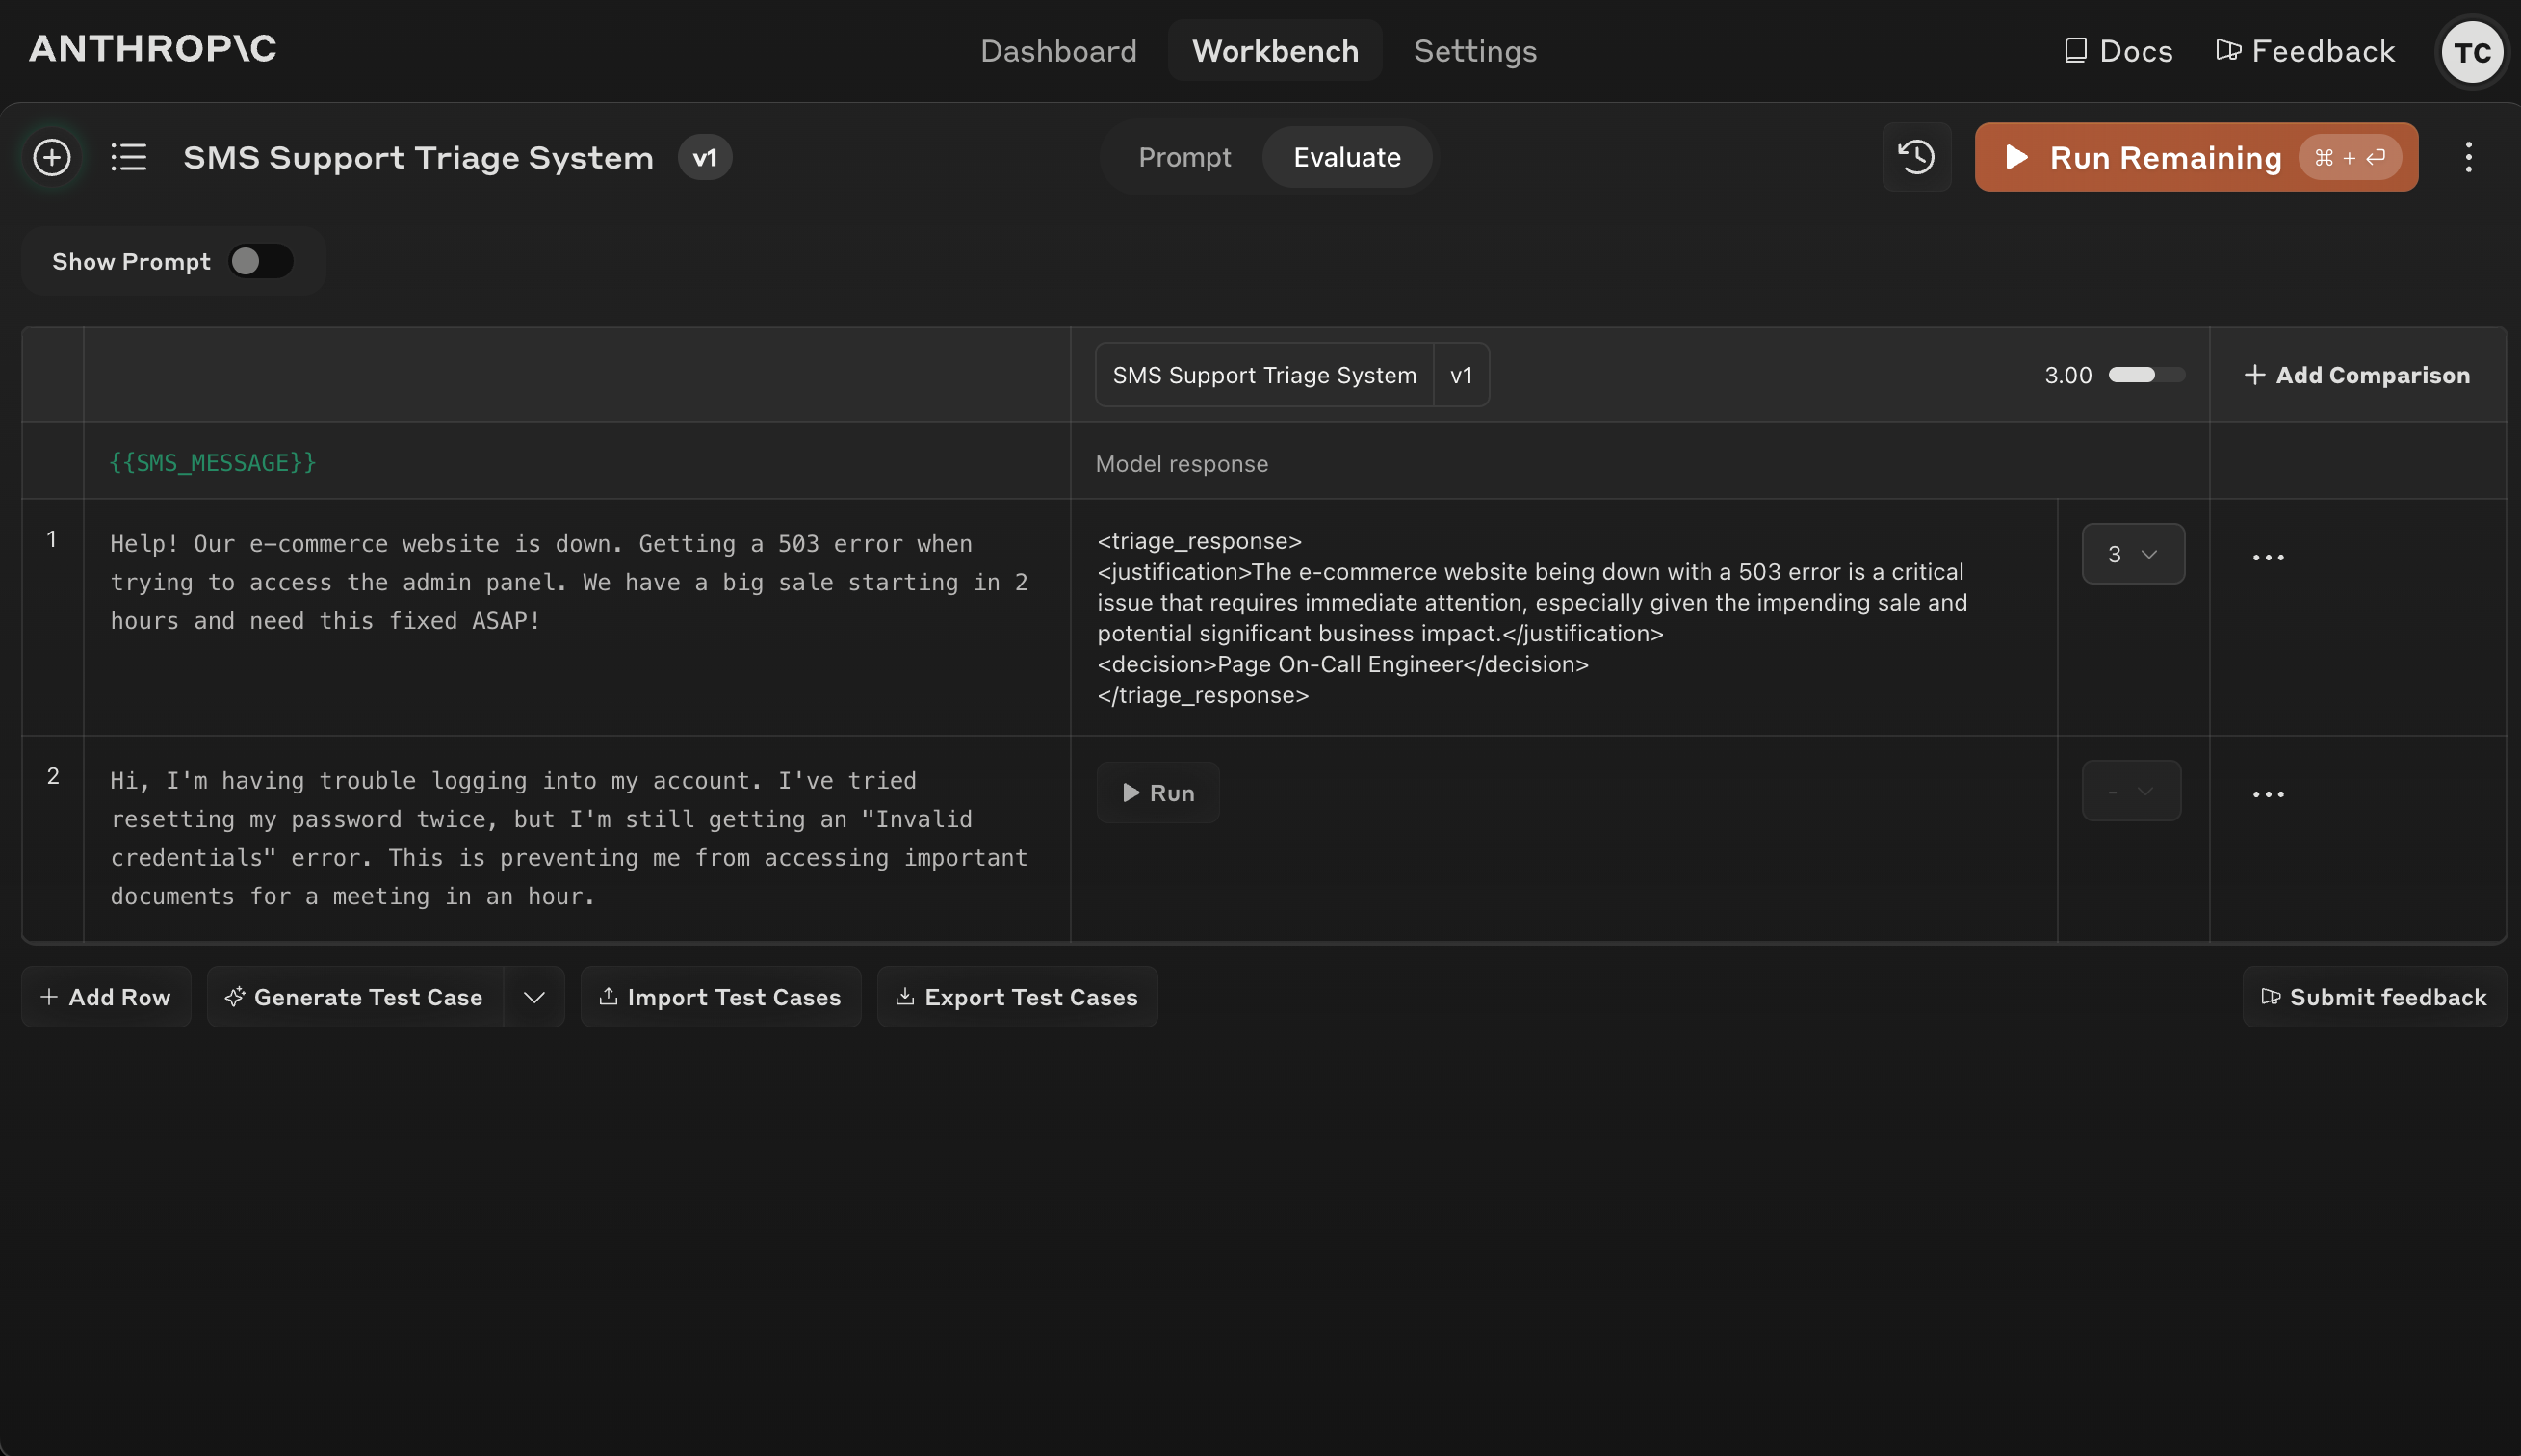

평가 결과 및 response 보고 프롬프트 수정: One sentence 를 two sentences 로

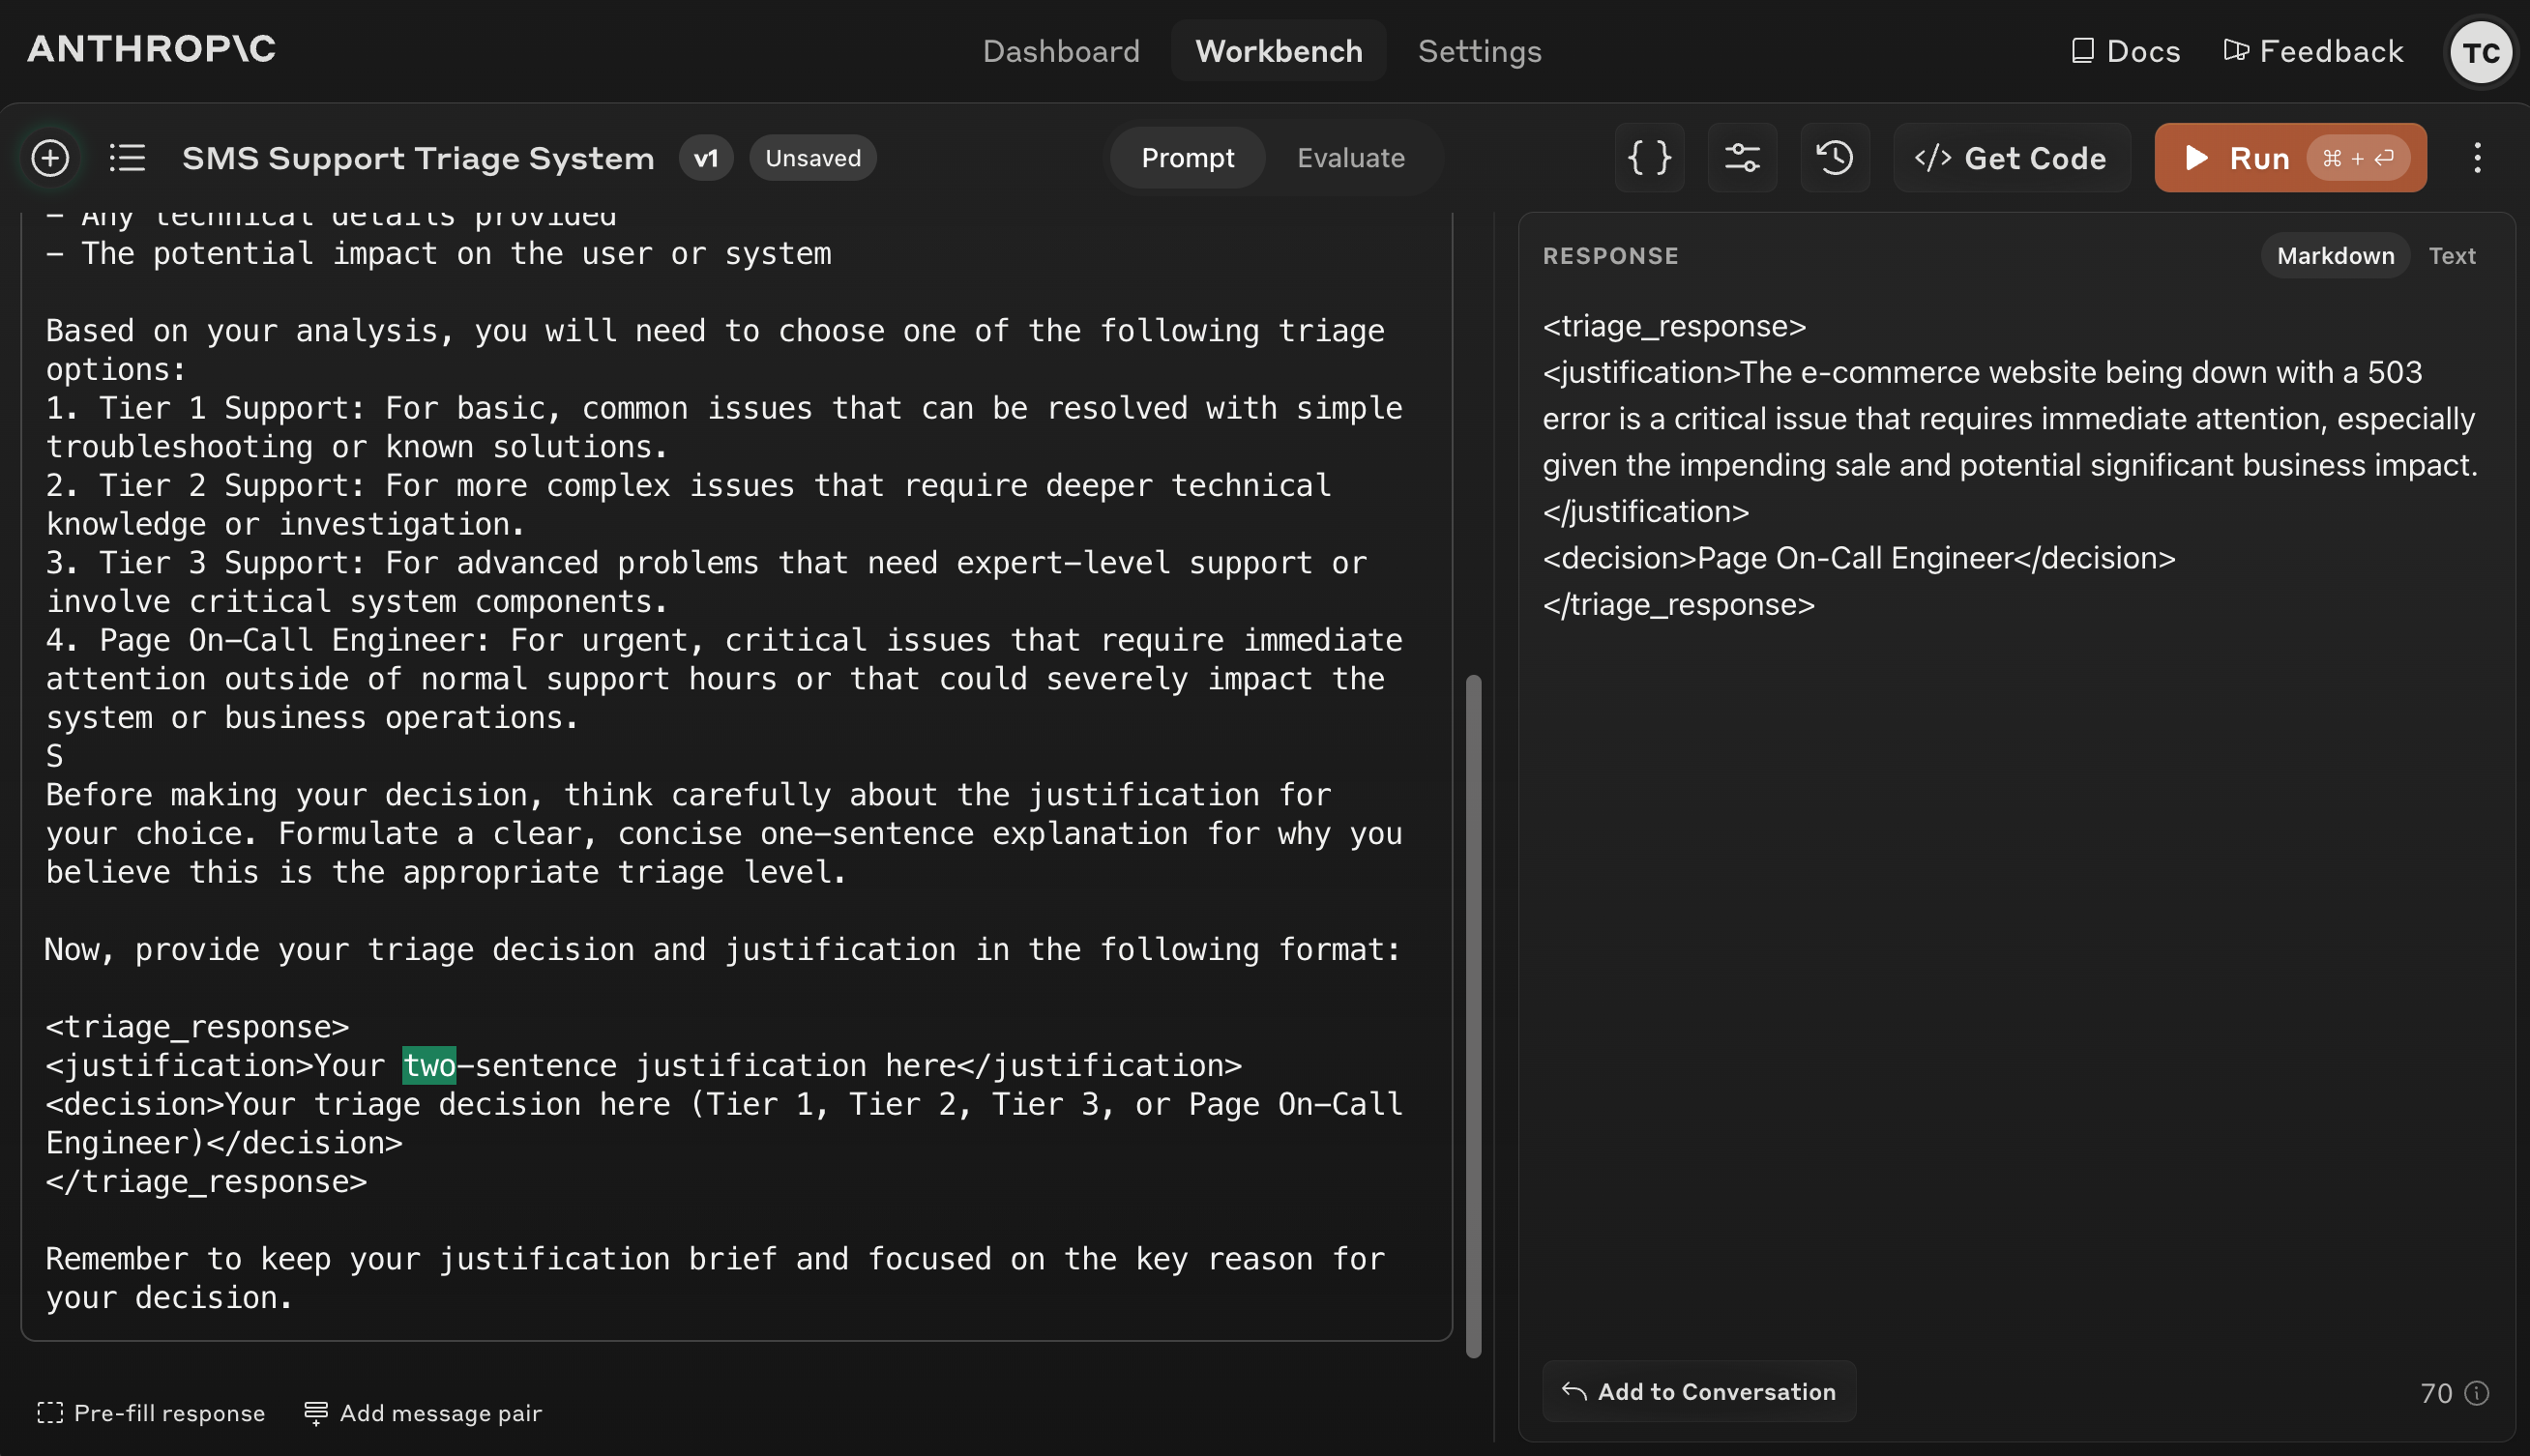

변경된 버전의 프롬프트에 대해 답변 생성 및 평가

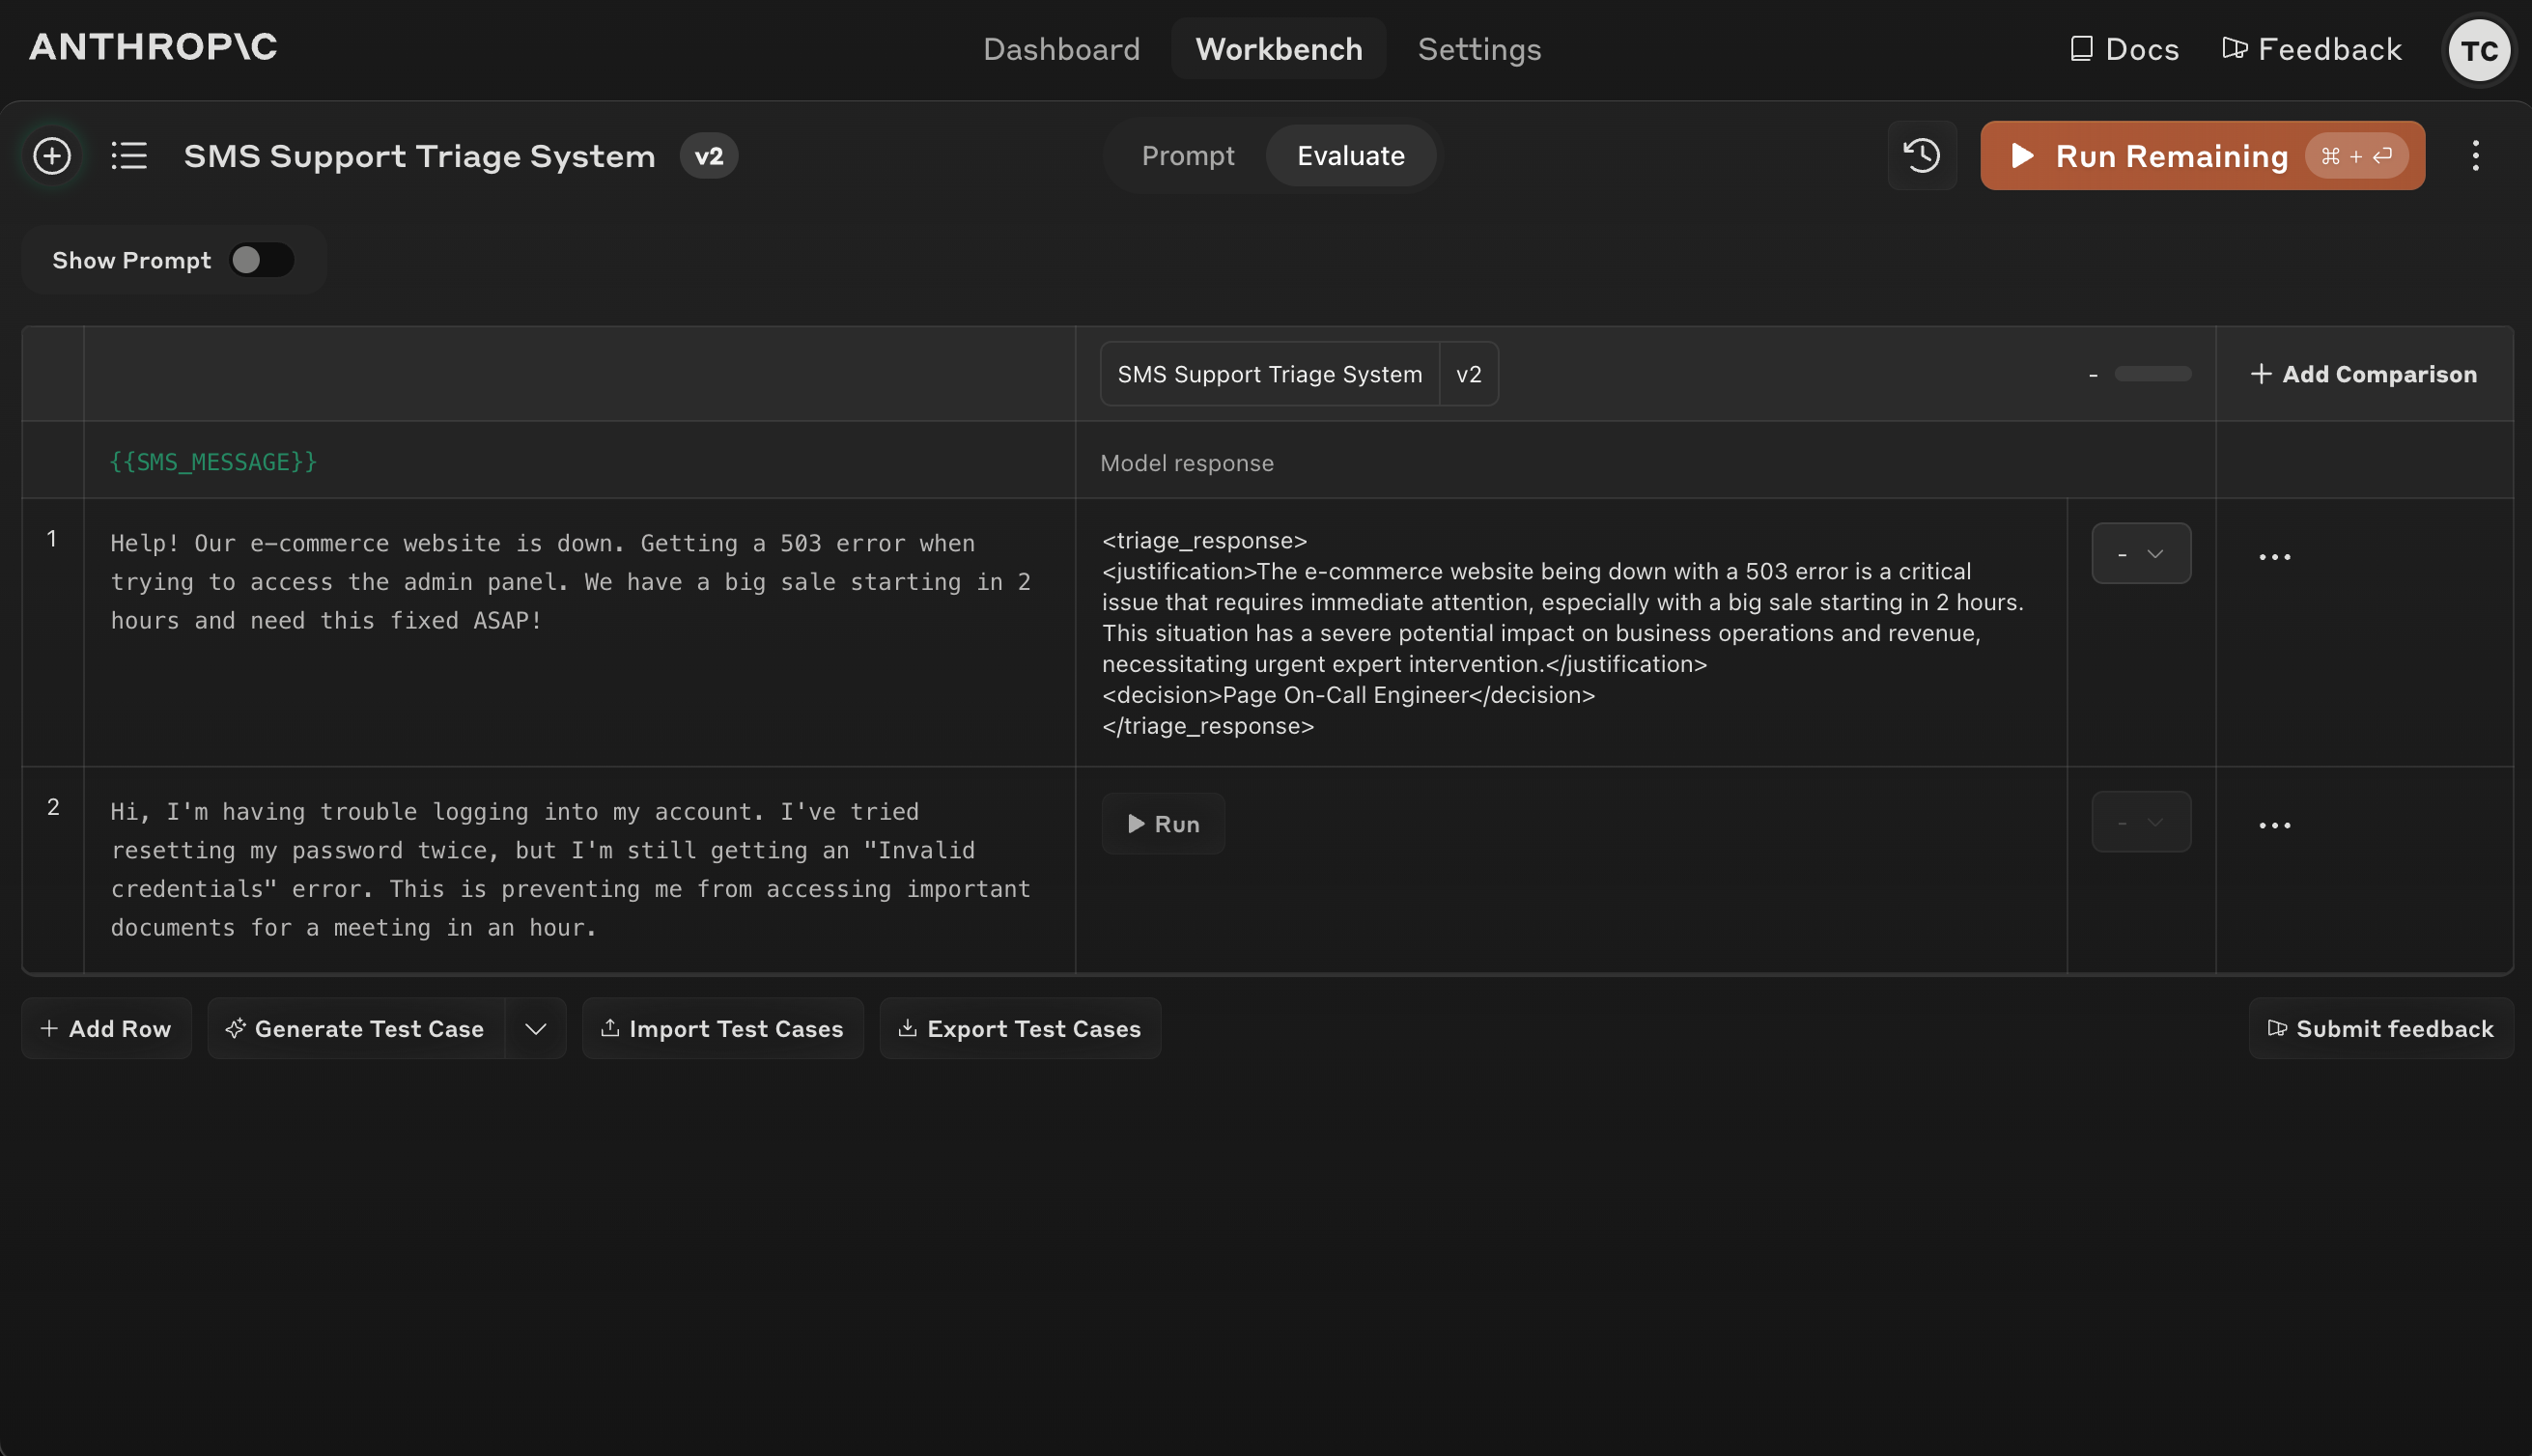

프롬프트 버전 별 비교

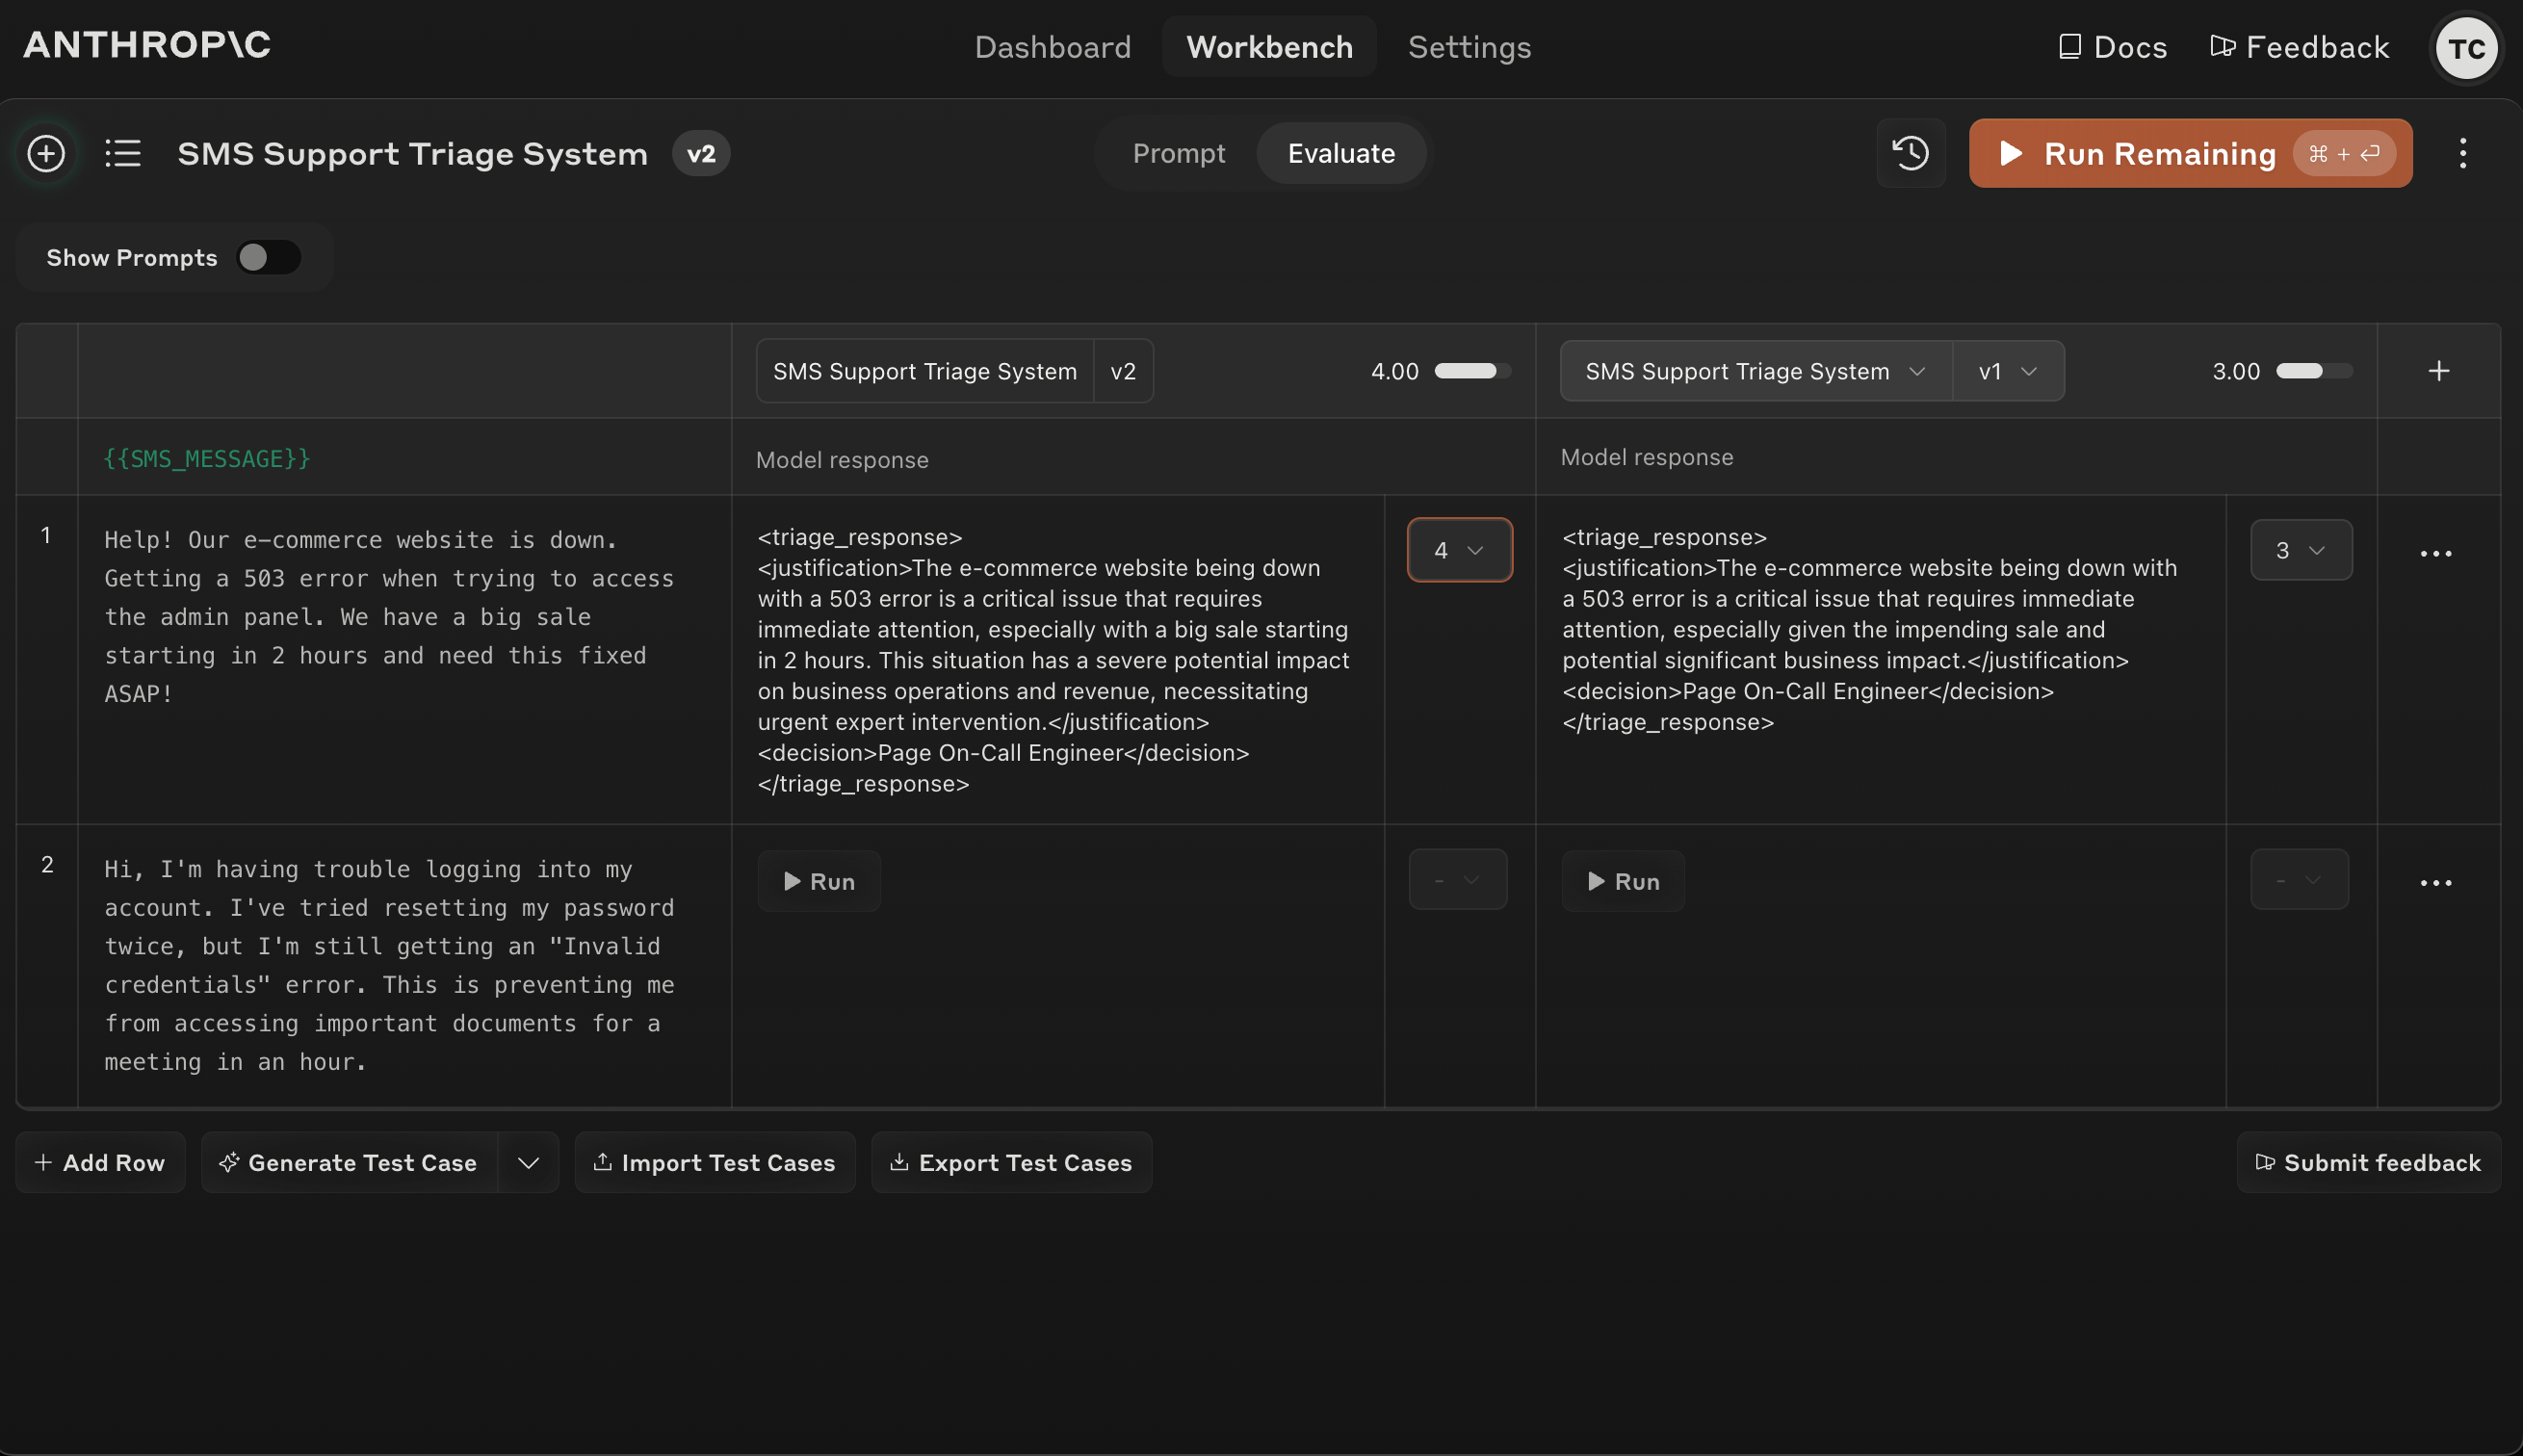

# **실습 (프롬프트 제출 필요)**

## **(Optional) Claude Prompt Generator**

위와 같이 (업무와 관련된) 분기 처리가 필요한 태스크를 정의, 이 태스크를 수행하기 위한 프롬프트를 스스로 작성하고, 작성한 프롬프트를 기반으로 프롬프트 생성, 예시문을 1) 스스로 작성 2) 예시문 생성 후 평가하고, 스스로 작성한 프롬프트와 Claude 가 작성한 프롬프트의 답변 결과를 비교해보세요.

예시 태스크) 사용자가 입력한 질문을 수학 선생님께 전달해야 할지, 사회 선생님께 전달해야 할지, 둘 다 애매해서 사람이 직접 보고 판단해야 할지 판단
- 직접 작성한 프롬프트와 Claude 가 변환한 프롬프트를 비교
- 직접 작성한 예시와 Claude 가 작성한 예시를 비교
- 직접 작성한 프롬프트를 실행할 때와 Claude 가 작성한 프롬프트를 실행했을 때의 답변 확인 및 평가, 결과 비교

## **GPT Prompt Optimizer**

GPT Prompt optimizer 를 활용해 여러분이 작성한 프롬프트를 모델별(5, 4.1, o3)로 최적화해보고, 어떤 변화가 있었는지 확인해보세요. 아래의 예시 프롬프트 대신 여러 분이 사용하고 싶은 프롬프트를 작성하고 변환해보는 것이 더 도움됩니다.

Prompt optimizer (로그인 필요): https://platform.openai.com/chat/edit?models=gpt-5&optimize=true

예시 프롬프트:

*"You are an expert productivity coach. I have a demanding full-time job, two young kids, and I’m trying to launch a side business. I often feel overwhelmed and struggle to prioritize tasks. Create a weekly action plan that balances work, family, and business. The plan should:
Include time-blocked schedules.


Suggest strategies to stay consistent despite interruptions.


Provide motivational tips tailored for someone who tends to procrastinate.


Present the output in a clean, easy-to-read table format."*



# **Prompt Compression**

Demo site의 예시 prompt 를 compression 라이브러리를 사용하지 않고, 프롬프트 엔지니어링을 이용해 개선해보세요.

Demo 프로그램을 이용해 compression 해보세요

Demo
https://huggingface.co/spaces/microsoft/llmlingua-2

Install https://github.com/microsoft/LLMLingua?tab=readme-ov-file#1-installing-llmlingua

# **Change runtime type (from CPU to T4 GPU)**

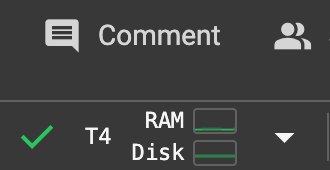

Compressed prompt 를 수작업으로 복사 붙여넣지 않아도 되도록, OpenAI API 와 Ollama 의 llama 실행 코드와 결합해보세요.

In [ ]:
!pip install llmlingua

In [ ]:
from llmlingua import PromptCompressor

# llm_lingua = PromptCompressor(
#     model_name="microsoft/llmlingua-2-xlm-roberta-large-meetingbank",
#     use_llmlingua2=True, # Whether to use llmlingua-2
# )

## Use LLMLingua-2-small model
llm_lingua = PromptCompressor(
    model_name="microsoft/llmlingua-2-bert-base-multilingual-cased-meetingbank",
    use_llmlingua2=True, # Whether to use llmlingua-2
)


In [ ]:
prompt = """Madam Court, could you please read docket 1239? Certainly. Docket 1239. The Committee on Government Operations, to which was referred on December 1st, 2021, docket number 1239 message an order authorizing the creation of a sheltered market program in conformity with the requirements of general laws. Chapter 30 B Section 18. This authorization applies to contracts for goods, professional services and support services. This authorization is for no more than six contracts, which must be awarded by June 30th, 2022. This sheltered market program shall be available for disadvantaged, minority and women only vendors, for whom there is a demonstrated substantial disparity in the city's 2020 disparities. Study submits a report recommending the order ought to pass. Thank you so much, Madam Clerk. The Chair recognizes Councilor Edwards, chair of the committee. Councilor Edwards. You have the floor. This is this is actually a matter, I believe, sponsored by the. Mayor in Cannes. In conformance with the recommendations from the disparity study and making sure that we opt in to this this pilot program under mass general laws 30 Section 18. Again, it's really just following the recommendations of an already studied issue, which which demonstrates a disparity between minority contractors or women contractors receiving contracts in the city of Boston. So this would allow for us to shepherd and move these six contracts to those already designated groups who have a disadvantage. And I think it's. Really fulfilling a promise. Of making sure that we go through and make sure all aspects of the city government, including the financial benefits, are accessible to people in the city of Boston. I recommend that this pass and I hope that my colleagues will vote for it. Thank you. Thank you so much. Councilor Edward seeks acceptance of the committee report and passage of Docket 1239. Madam Court, could you please call the roll? Certainly. Docket 1239. Councilor Arroyo. Yes. Councilor Arroyo. Yes. Councilor Baker. Councilor Baker. Councilor. Councilor Barker. Council Braden. Councilor Braden. Councilor Campbell. Councilor Campbell. Yes. Councilor Edwards. Yes. Councilor Sabby. George. Councilor Sabby. George. He has Councilor Flaherty. Councilor Flaherty as Councilor Flynn. Councilor Flynn. Yes. Councilor Jane. Yes. Councilor Janey. As Councilor me here. Councilor me here as Councilor Murphy. Councilor Murphy. Yes. And Councilor O'Malley. Yes. Councilor O'Malley. Yes. Madam President, do I get number 1239 has received unanimous vote. Thank you so much. Dockett 1239 has passed and now we will move on to matters recently heard for possible action. Madam Clerk, if you could please read docket 0863. Certainly Docket 0863 order for hearing to discuss pest control and illegal dumping in the city of Boston."""
compressed_prompt = llm_lingua.compress_prompt(prompt, rate=0.33, force_tokens = ['\n', '?'])

In [ ]:
print('original prompt length: ', len(prompt))
print('compressed prompt length: ',len(compressed_prompt['compressed_prompt']))
compressed_prompt['compressed_prompt']

original prompt length:  2822
compressed prompt length:  1063


"Court read docket 1239? Committee on Government Operations referred December 1st 2021 docket 1239 order authorizing creation sheltered market program general laws Chapter 30 B Section 18 authorization applies to contracts goods professional services support services no more than six contracts awarded by June 30th 2022 sheltered market program available for disadvantaged minority women vendors disparity 2020 disparities Study report order pass Chair recognizes Councilor Edwards sponsored by Mayor in Cannes recommendations disparity study pilot program general laws 30 Section 18 disparity between minority contractors women Boston six contracts to groups disadvantage. city government financial benefits accessible Boston recommend pass colleagues vote Councilor Edward seeks acceptance committee report passage Docket 1239. call roll? Docket 1239 Councilor Arroyo SabbyCouncilor Flynn Councilor Jane Murphy O ' Malley number 1239 unanimous vote Dockett 1239 passed move matters action read doc

# **Answers**

https://colab.research.google.com/drive/1qSYXaPjLHtu1-fAyBOlDnylQU3HkNkpo#scrollTo=Y5yCvU0hafnO